<a href="https://colab.research.google.com/github/flamartini/PUCRIO_EAD_CIENCIA_DADOS/blob/main/MVP_Machine_Learning_%26_Analytics_N%C3%ADveis_de_obesidade_Vers%C3%A3o_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Treinar modelos de machine learning para um problema de classificação**

# **Definição do Problema**

**Dataset para estimativa de níveis de obesidade baseada em hábitos alimentares e condição física de indivíduos da Colômbia, Peru e México:**

Essa base de dados apresenta dados da estimativa de níveis de obesidade em indivíduos dos países do México, Peru e Colômbia, baseada nos seus hábitos alimentares e condição física. O Dataset contém 17 atributos e 2111 registros. Os registros são nomeados com a classe variável de resposta NObesity (Nível de obesidade), que permite classificar os dados usando valores de: Peso insuficiente, Peso Normal, Sobrepeso nível I, Sobrepeso nível II, Obesidade tipo I, Obesidade tipo II e Obesidade tipo III. Nesta base de dados, cada linha representa uma observação de um indivíduo com relação às suas características físicas e hábitos alimentares. Conforme normativa mexicana, de acordo com a fórmula do IMC (índice de massa corpórea), temos as seguintes classificações com relação aos níveis de obesidade:

**Mass body index** = Weight/height*height

*   **Peso insuficiente:** menos que 18.5 IMC
*   **Peso normal:** 18.5 até 24.9 IMC
*   **Sobrepeso:** 25.0 até 29.9 IMC
*   **Obesidade I:** 30.0 até 34.9 IMC
*   **Obesidade II:** 35.0 até 39.9 IMC
*   **Obesidade III:** maior que 40 IMC

Para mais detalhes sobre este dataset, consulte: (https://doi.org/10.1016/j.dib.2019.104344). Para discussão e mais informação sobre a criação do dataset, referenciar o artigo completo “Obesity Level Estimation Software based on Decision Trees” (De-La-Hoz-Correa et al., 2019).

#### **Premissas ou hipóteses sobre o problema**

Este Dataset pode ser utilizado para gerar ferramentas computacionais inteligentes para identificar o nível de obesidade de um indivíduo e construir sistemas de recomendação de monitoramento de níveis de obesidade para uma determinada população.
Perguntas da pesquisa usada para uma memória inicial de informação:

*   Qual gênero? **Feminino, Masculino.**
*   Qual a idade? **Valor numérico.**
*   Qual a altura? **Valor numérico em metros.**
*   Qual o peso? **Valor numérico em Kg.**
*   Existe membro da família que sofre ou sofreu de sobrepeso? **Sim/Não.**
*   Consome alimentos altamente calóricos frequentemente? **Sim/Não.**
*   Geralmente consome vegetais em suas refeições? **Nunca/Às vezes/Sempre.**
*   Quantas refeições principais faz diariamente? **Entre 1 e 2, 3, mais de 3.**
*   Costuma comer entre as refeições? **Não/Às vezes/Frequentemente/Sempre.**
*   É fumante: **Sim/Não.**
*   Quanto consome de água diariamente (em litros)? **Menos de 1 litro, entre 1 e 2 litros, mais de 2 litros.**
*   Costuma monitorar as calorias que ingere diariamente? **Sim/Não.**
*   Com que frequência pratica atividade física? **Não pratica, 1 ou 2 dias, 2 ou 4 dias, 4 ou 5 dias.**
*   Quanto tempo utiliza aparelhos eletrônicos como celular, TV, vídeogame, computadores e outros? **0-2 horas, 3-5 horas, mais que 5 horas.**
*   Com que frequência toma bebidas alcoólicas? **Não bebe, Às vezes, Frequentemente, Sempre.**
*   Que tipo de transporte costuma utilizar? **Automóvel, Motocicleta, Bicicleta, Transporte público, Caminhada.**



#### **Restrições ou condições impostas para selecionar os dados**

Este Dataset apresenta a restrição de conter uma população específica do México, Peru e Colômbia e segue uma classificação de nível de obesidade conforme normativa mexicana, de acordo com valores do IMC (índice de massa corpórea).

#### **Atributos do Dataset**

Dicionário de dados: 17 atributos.

> **Atributos relacionados a hábitos alimentares:**

**FAVC**  - Consumo de alimentos altamente calóricos (Yes, No).

**FCVC**  - Frequência de consumo de vegetais (Never, Sometimes, Always).

**NCP**   - Número de refeições principais.

**CAEC**  - Consumo de alimentos entre as refeições (No, Sometimes, Frequently, Always).

**CH2O**  - Consumo diário de água (em litros).

**CALC**  - Consumo de álcool (Always, Frequently, No, Sometimes).

> **Atributos relacionados à condição física:**

**SCC**    - Monitoramento de consumo de calorias (Yes, No).

**FAF**    - Frequência de atividade física (I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 days).

**TUE**    - Tempo de uso de dispositivos tecnológicos (0–2 hours, 3–5 hours, More than 5 hours).

**MTRANS** - Transporte utilizado (Automobile, Bike, Motorbike, Public_Transportation, Walking).

> **Outras variáveis:**

**family_history_with_overweight** - histórico familiar de sobrepeso (Yes/No).

**Gender** - Gênero (Female/Male).

**Age** - Idade (em anos).

**Height** - Altura (em metros).

**Weight** - Peso (em Kg).

> **Variável de classe:**

**NObesity** - Nível de obesidade.

*   **Insufficient_Weight** - Peso insuficiente
*   **Normal_Weight**       - Peso normal
*   **Overweight_Level_I**  - Sobrepeso nível I
*   **Overweight_Level_II** - Sobrepeso nível II
*   **Obesity_Type_I**      - Obesidade tipo I
*   **Obesity_Type_II**     - Obesidade tipo II
*   **Obesity_Type_III**    - Obesidade tipo III










A análise deste dataset implica em um **aprendizado de máquina supervisionado de classificação multivariada** (mais de duas classes no target), que é definido pelo uso de conjuntos de dados rotulados para treinar algoritmos que classificam dados ou preveem resultados com precisão.

# Preparação de Dados

### **Separação do dataset entre treino e teste**

Antes da execução da separação das bases de treino e teste, iremos executar uma série de passos para limpeza e transformação dos dados, para que o algoritmo de machine learning possa obter o melhor desempenho possível.

In [261]:
# importação do Pandas, que é um pacote fundamental para a computação científica com Python.
import pandas as pd

In [262]:
import warnings
warnings.filterwarnings("ignore")

In [263]:
# importando dados de uma url para um dataframe

# url a importar - Estimation of obesity levels based on eating habits and physical condition
# Doado em 26/08/2019
# Área da matéria: Saúde e Medicina
# Características do Dataset: Multivariável
# Instâncias: 2111, Features: 17
url_dados = 'https://raw.githubusercontent.com/flamartini/PUCRIO_EAD_CIENCIA_DADOS/main/ObesityDataSet_raw_and_data_sinthetic(1).csv'

# labels dos atributos do dataset
labels_atributos = ['Gender',	'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC',	'FAF', 'TUE',	'CALC',	'MTRANS',	'NObeyesdad']

# carga do dataset através da url
data_obesity = pd.read_csv(url_dados, names=labels_atributos, header = 0) # informar índice 0 para header

# Dataset original
data_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [264]:
# quantidade de registros por nível de obesidade
id_counts = data_obesity['NObeyesdad'].value_counts()
id_counts.head(10)

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [265]:
# importação do pyplot
import matplotlib.pyplot as plt

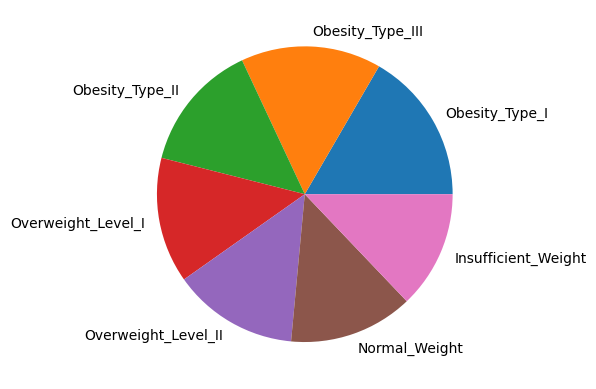

In [266]:
# Atribuindo os valores de NObeyesdad e quantidade, conforme a função value_counts() analisada anteriormente para algumas características
NObeyesdad = ['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight']
quantidade = [351, 324, 297, 290, 290, 287, 272]

# criando o gráfico de pizza
plt.pie(quantidade, labels = NObeyesdad);

Nota-se que as classes alvo do dataset estão balanceadas.

In [267]:
# resumo estatístico
data_obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Avaliando os possíveis outliers no dataset original.

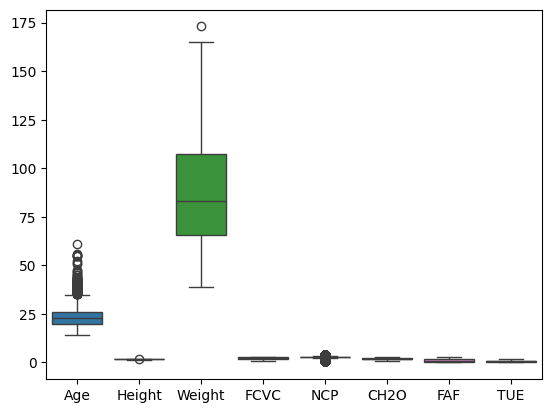

In [268]:
# importação do Seaborn
import seaborn as sns

sns.boxplot(data = data_obesity);

In [269]:
# quantodade de registros com idade igual ou acima de 30 anos
idade_maior_igual_a_30 = pd.to_numeric(data_obesity['Age'], errors="coerce") >= 30.00
idade_maior_igual_a_30.value_counts()


Age
False    1747
True      364
Name: count, dtype: int64

In [270]:
# cálculo da moda para os atributos numéricos
data_obesity.mode(numeric_only=True)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,18.0,1.7,80.0,3.0,3.0,2.0,0.0,0.0


Nota-se uma faixa etária bastante jovem no dataset, por isso uma quantidade maior de outliers para faixas etárias mais velhas, e verifica-se alguns poucos outliers para os atributos **Height**, **Weight** e **NCP**.

> Neste DataSet podemos agregar mais uma característica como o **IMC (índice de massa corpórea)** para podermos simplificar os atributos '**Weight**' e '**Height**' , além de verificar a consistência dos dados conforme o padrão mexicano apresentado de índice de obesidade (variável classe).

**IMC** **=** **Weight**/**height** * **height**

In [271]:
# criando a nova coluna IMC
data_obesity['IMC'] = 'none'

# transformando as colunas que serão utilizadas no cálculo do IMC para numéricas
data_obesity['IMC'] = pd.to_numeric(data_obesity['IMC'], errors="coerce")
data_obesity['Weight'] = pd.to_numeric(data_obesity['Weight'], errors="coerce")
data_obesity['Height'] = pd.to_numeric(data_obesity['Height'], errors="coerce")

# função para atualizar a variável target de acordo com o IMC e garantir que não haja dados ruidosos ou incorretos
def Atualizar_target_IMC():
  # atribuindo o IMC para cada registro do DataSet
  for i in range(len(data_obesity['IMC'])):
    if i == 2111 :
      break
    data_obesity['IMC'][i] = float(data_obesity['Weight'][i])/(float((data_obesity['Height'][i]) * float(data_obesity['Height'][i])))

Atualizar_target_IMC()

> Outra possível variável agregada interessante que pode ser incluída no contexto deste Dataset, seria o cálculo do **peso ideal** conforme altura.
Segundo a OMS existe uma faixa mínima e máxima de peso saudável, conforme abaixo:

**Peso ideal mínimo** = 18,5 (IMC) * Altura em metros * Altura em metros

**Peso ideal maximo** = 25 (IMC) * Altura em metros * Altura em metros

In [272]:
# criando a nova coluna Peso ideal maximo
data_obesity['Peso_ideal_maximo'] = 'none'
data_obesity['Peso_ideal_maximo'] = pd.to_numeric(data_obesity['Peso_ideal_maximo'], errors="coerce")

# atribuindo o Peso ideal maximo para cada registro do DataSet
for i in range(len(data_obesity['Peso_ideal_maximo'])):
  if i == 2111 :
    break
  data_obesity['Peso_ideal_maximo'][i] = float(25)*(float((data_obesity['Height'][i]) * float(data_obesity['Height'][i])))

data_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC,Peso_ideal_maximo
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526,65.610000
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227,57.760000
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432,81.000000
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852,81.000000
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,79.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475,73.164928
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923,76.438650
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817,76.755647
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535,75.642158


In [273]:
# avaliar valores missing
data_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Observa-se que não existem valores faltantes no dataset.



> Estudo da **correlação** entre preditores e entre preditores e uma variável-alvo.



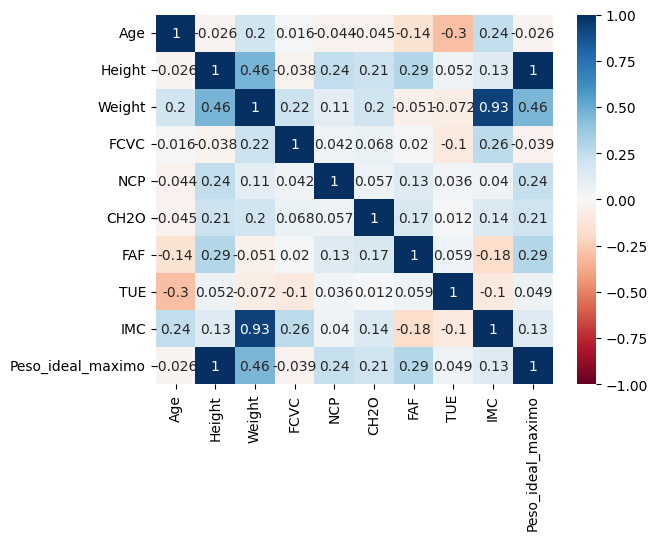

In [274]:
# gráfico de correlação com Seaborn
sns.heatmap(data_obesity.corr(numeric_only = True), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Verificou-se que os atributos agregados **IMC** e **Peso_ideal_maximo** exibem uma alta correlação com relação aos atributos **Height** e **Weight**.



> **Normalização dos dados**

A **normalização** redimensiona os dados de um ou mais atributos do intervalo original para o intervalo de 0 a 1, com o objetivo de alterar os valores para uma escala comum, sem distorcer as diferenças nos intervalos de valores.


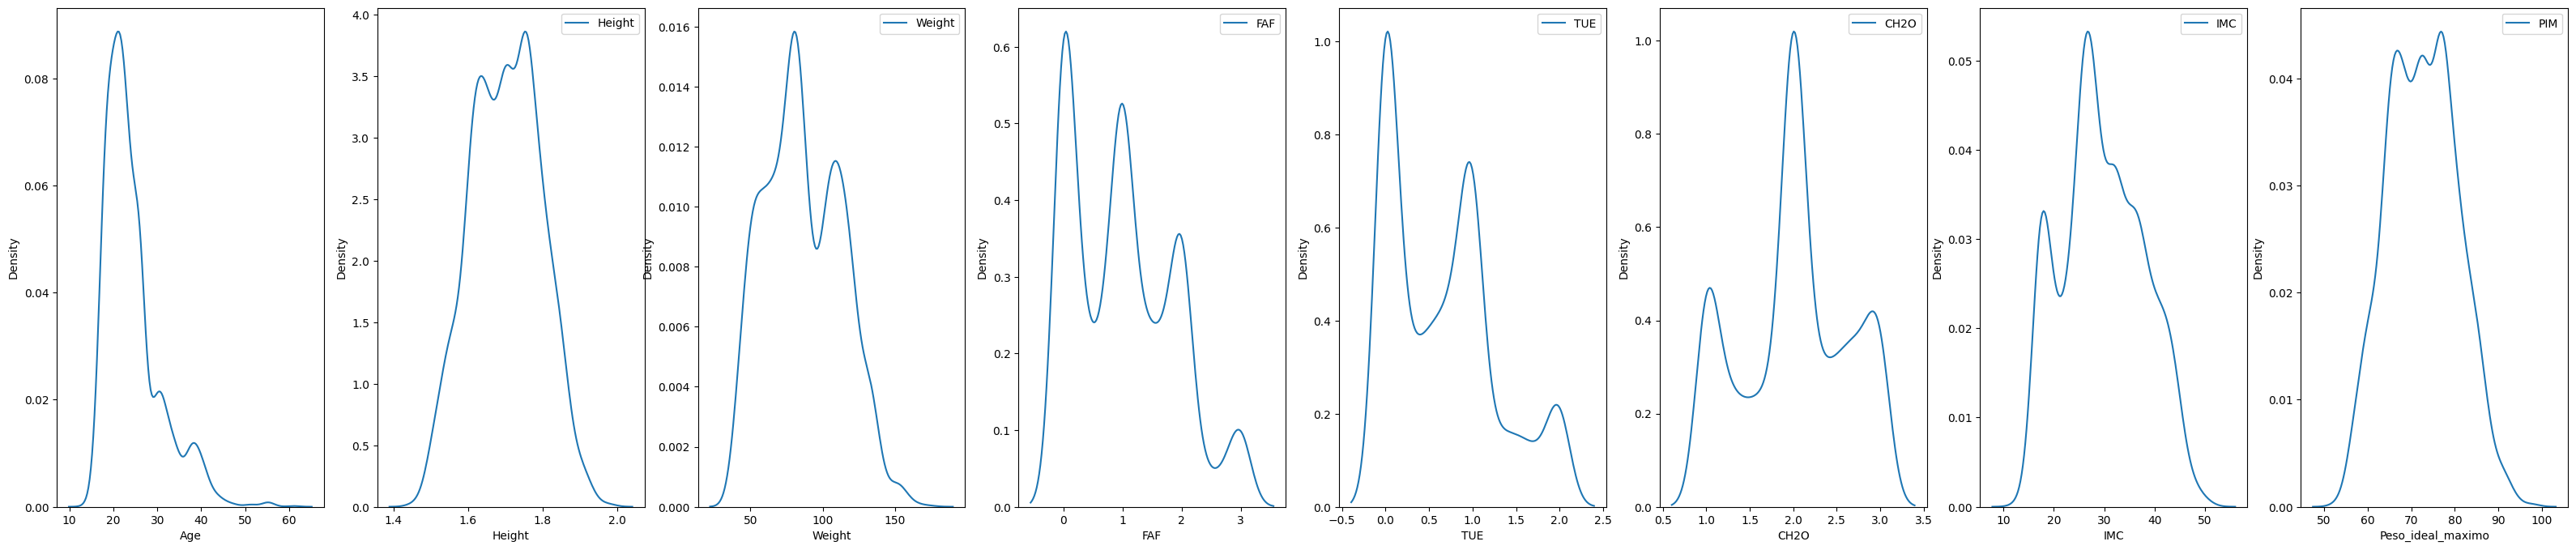

In [275]:
# Avaliando a normalização dos dados através de gráfico
# kdeplot => método para visualizar a distribuição de observações em um dataset

fig, ax = plt.subplots(ncols=8,figsize=(40,8))

sns.kdeplot(data_obesity.Age,ax=ax[0])
sns.kdeplot(data_obesity.Height,ax=ax[1],label='Height')
sns.kdeplot(data_obesity.Weight,ax=ax[2],label='Weight')
sns.kdeplot(data_obesity.FAF,ax=ax[3],label='FAF')
sns.kdeplot(data_obesity.TUE,ax=ax[4],label='TUE')
sns.kdeplot(data_obesity.CH2O,ax=ax[5],label='CH2O')
sns.kdeplot(data_obesity.IMC,ax=ax[6],label='IMC')
sns.kdeplot(data_obesity.Peso_ideal_maximo,ax=ax[7],label='PIM')

ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()

plt.show()

Verifica-se que os dados seguem um **padrão normal razoável de distribuição**, mas possuem valores escalares muito diferentes para alguns atributos como **Height**, **Weight**, **IMC** e **Peso_ideal_maximo**. Esses atributos possuem uma **média** e **mediana** bem similares, o que sugere uma distribuição normal, porém possuem escala bem variada conforme os seus **min** e **max**, o que pode ser visualizado abaixo.

In [276]:
# Resumo estatístico
data_obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC,Peso_ideal_maximo
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700159,72.610187
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011337,7.940221
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685,52.562500
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.325802,66.422500
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.719089,72.292421
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.016501,78.186623
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753,98.010000


Falamos que **uma sequencia de dados é uma normal** quando a maioria dos dados estão muito póximos da média e os dados mais diferentes da média são poucos.

Vamos aplicar a **normalização** de alguns atributos, utilizando o método **RobustScaler**, que é robusto para tratamento de outliers, e avaliar novamente a curva de distribuição

<Axes: ylabel='Density'>

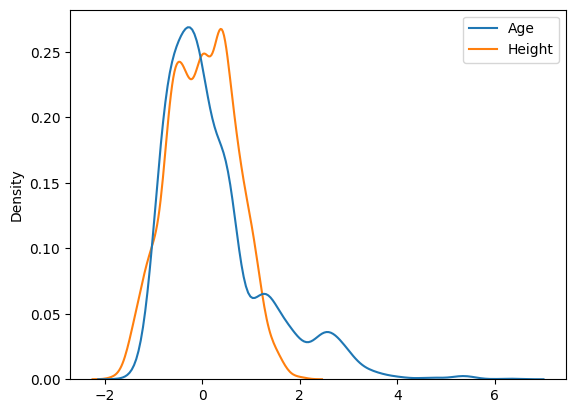

In [277]:
# imports necessários
from sklearn.preprocessing import RobustScaler

# aplicando a normalização
data_obesity_features_norm = RobustScaler().fit_transform(data_obesity[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'FAF', 'TUE', 'CH2O', 'IMC', 'Peso_ideal_maximo']])
data_obesity_features_norm = pd.DataFrame(data_obesity_features_norm, columns=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'FAF', 'TUE', 'CH2O', 'IMC', 'Peso_ideal_maximo'])

# curva de distribuição
sns.kdeplot(data=data_obesity_features_norm[['Age', 'Height']])

<Axes: ylabel='Density'>

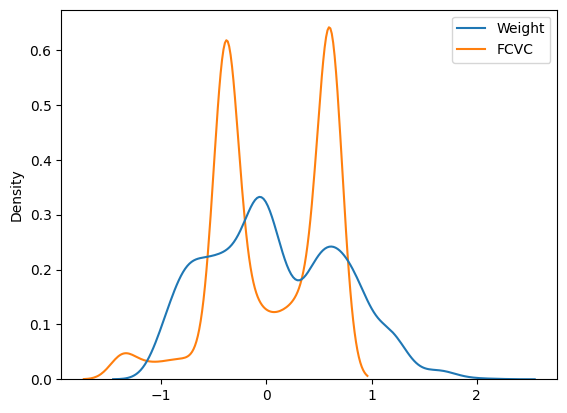

In [278]:
# curva de distribuição
sns.kdeplot(data=data_obesity_features_norm[['Weight','FCVC']])

<Axes: ylabel='Density'>

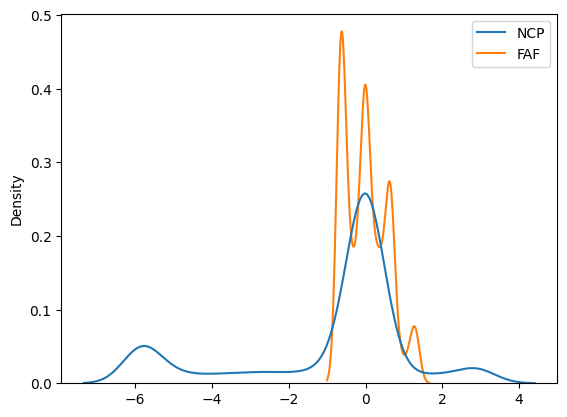

In [279]:
# curva de distribuição
sns.kdeplot(data=data_obesity_features_norm[['NCP', 'FAF']])

<Axes: ylabel='Density'>

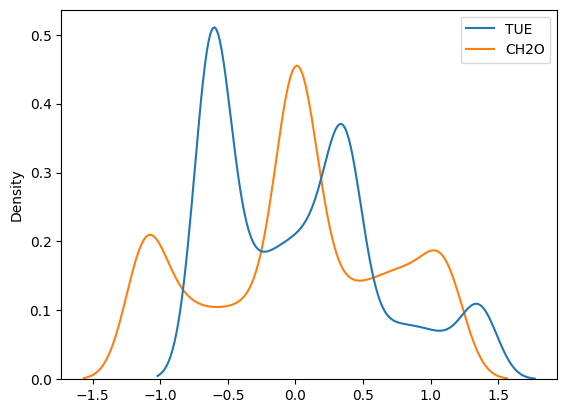

In [280]:
# curva de distribuição
sns.kdeplot(data=data_obesity_features_norm[['TUE', 'CH2O']])

<Axes: ylabel='Density'>

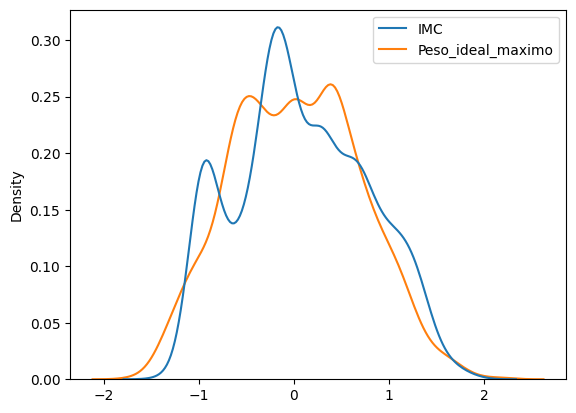

In [281]:
# curva de distribuição
sns.kdeplot(data=data_obesity_features_norm[['IMC', 'Peso_ideal_maximo']])

Percebe-se que as curvas de distribuição dos dados não se alteraram após a aplicação da normalização.

In [282]:
# dataset normalizado
data_obesity_features_norm

,Age,Height,Weight,FCVC,NCP,FAF,TUE,CH2O,IMC,Peso_ideal_maximo
0,-0.293730,-0.581371,-0.452841,-0.385502,0.0000,-0.648436,0.374650,0.000000,-0.370599,-0.568034
1,-0.293730,-1.303581,-0.643511,0.614498,0.0000,1.296872,-0.625350,1.120313,-0.383284,-1.235317
2,0.036695,0.718606,-0.143002,-0.385502,0.0000,0.648436,0.374650,0.000000,-0.423726,0.740181
3,0.697546,0.718606,0.095335,0.614498,0.0000,0.648436,-0.625350,0.000000,-0.159720,0.740181
4,-0.128517,0.574164,0.162069,-0.385502,-5.8606,-0.648436,-0.625350,0.000000,-0.032223,0.588023
...,...,...,...,...,...,...,...,...,...,...
2106,-0.297556,0.073889,1.153756,0.614498,0.0000,0.438517,0.280897,-0.304569,1.384210,0.074167
2107,-0.131335,0.347274,1.209394,0.614498,0.0000,0.221370,-0.026080,0.005747,1.285024,0.352447
2108,-0.041940,0.373433,1.208116,0.614498,0.0000,0.268588,0.020938,0.060713,1.268079,0.379393
2109,0.261704,0.281308,1.199948,0.614498,0.0000,0.090202,-0.039315,0.954887,1.313219,0.284742


In [283]:
data_obesity_features_norm.describe()

,Age,Height,Weight,FCVC,NCP,FAF,TUE,CH2O,IMC,Peso_ideal_maximo
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.253553,0.008510,0.085469,0.033541,-0.921204,0.006677,0.032516,0.008975,0.083919,0.027011
std,1.048434,0.673856,0.624233,0.533927,2.279887,0.551555,0.608927,0.686700,0.685274,0.674952
min,-1.450218,-1.809127,-1.048684,-1.385502,-5.860600,-0.648436,-0.625350,-1.120313,-1.344693,-1.677126
25%,-0.467667,-0.509150,-0.417726,-0.385502,-1.000000,-0.567702,-0.625350,-0.465140,-0.375793,-0.498968
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.532333,0.490850,0.582274,0.614498,0.000000,0.432298,0.374650,0.534860,0.624207,0.501032
max,6.314773,2.018582,2.145036,0.614498,2.930300,1.296872,1.374650,1.120313,1.889764,2.186103


Normalização nem sempre ajuda no que diz respeito ao desempenho no processo de otimização. Um caso óbvio é quando as variáveis explicativas do seu dataset não são tão diferentes assim em escala. Tecnicamente falando, a normalização não é necessária para a Regressão Logística, pois ela trata com probabilidades relacionadas as classes envolvidas, se preocupa em desenhar uma “fronteira” de decisão em torno de um limiar (o famoso threshold).

Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas, como é o caso das regressões lineares multivariadas. Random Forest, como o próprio nome diz, é apenas uma coleção de “árvores”, e os processos utilizados para a geração dessas “árvores” não envolvem o uso de distâncias euclidianas. Random Forest trabalha com a técnica de particionamento recursivo.

Avaliando a distribuição univariada de alguns atributos do dataset e sua densidade através da função **displot**, e também a distribuição bivariada de alguns pares de atributos, e com isso aprimorar a avaliação da normalização dos dados.

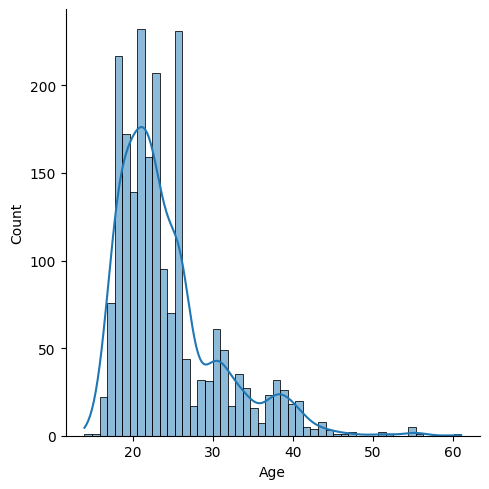

In [284]:
# atributo Age
sns.displot(data = data_obesity, x = 'Age', kde = True)

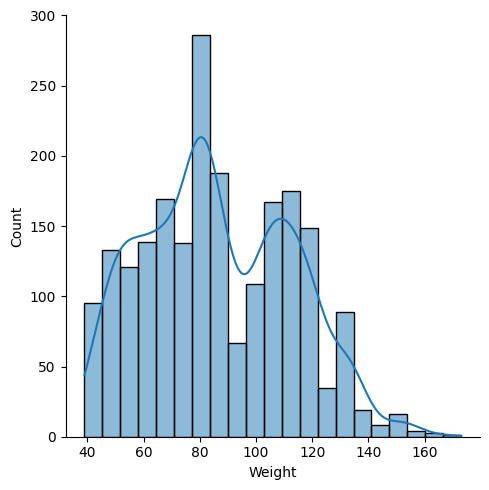

In [285]:
# atributo Weight
sns.displot(data = data_obesity, x = 'Weight', kde = True)

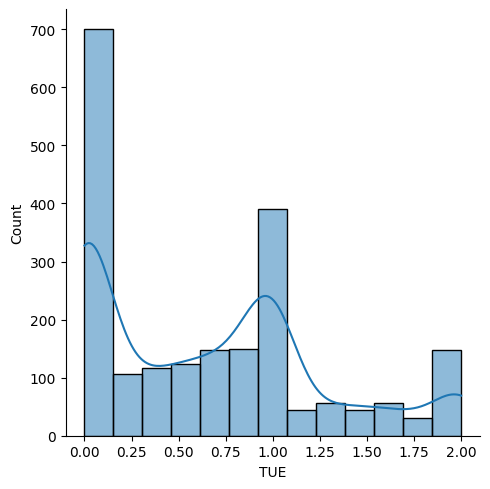

In [286]:
# atributo TUE
sns.displot(data = data_obesity, x = 'TUE', kde = True)

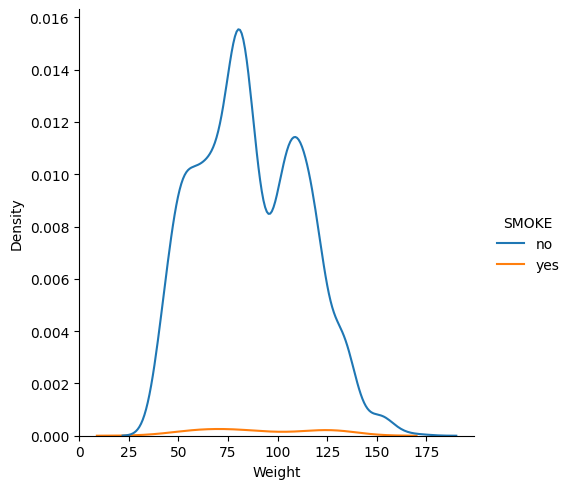

In [287]:
sns.displot(data=data_obesity, x="Weight", hue="SMOKE", kind="kde")

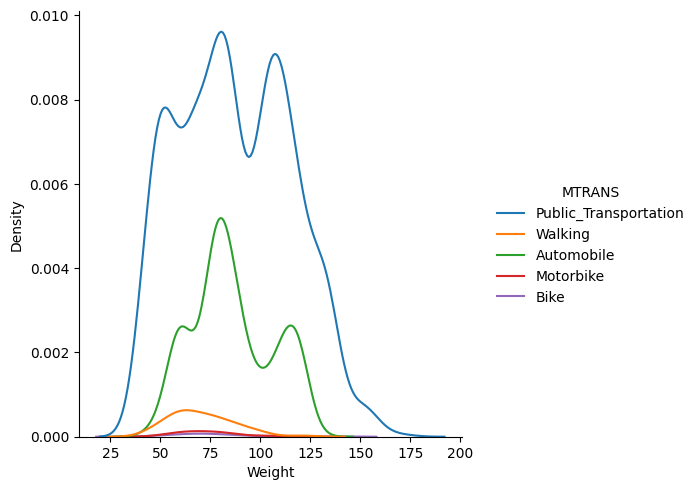

In [288]:
sns.displot(data=data_obesity, x="Weight", hue="MTRANS", kind="kde")

### **Limpeza e transformação dos dados**



> Vamos aplicar **one-hot encoding** para categorias onde a ordem e precedência dos valores não devem ter importância, ou seja, vamos criar um atributo binário para cada atributo categórico. Para as categorias onde a ordem e precedência dos valores tem importância, vamos aplicar o **mapeamento de catagorias**.



In [289]:
# Imports necessários
from sklearn.preprocessing import OneHotEncoder

# criando uma nova variável de dataframe para aplicar as transformações
data_obesity_new = pd.DataFrame(data_obesity)

# fazendo o mapeamento de categorias para valores ordinais, onde a precedência dos valores tem importância
# atributo NObeyesdad
NObeyesdad_CAT_mapping = {"Insufficient_Weight" : 1, "Normal_Weight" : 2, "Overweight_Level_I" : 3,
                         "Overweight_Level_II" : 4, "Obesity_Type_I" : 5, "Obesity_Type_II" : 6, "Obesity_Type_III" : 7}
data_obesity_new['NObeyesdad'] = data_obesity_new['NObeyesdad'].map(NObeyesdad_CAT_mapping)

# atibuto CAEC
CAEC_CAT_mapping = {"no" : 1, "Sometimes" : 2, "Frequently" : 3, "Always" : 4}
data_obesity_new['CAEC'] = data_obesity_new['CAEC'].map(CAEC_CAT_mapping)

# atributo CALC
CALC_CAT_mapping = {"no" : 1, "Sometimes" : 2, "Frequently" : 3, "Always" : 4}
data_obesity_new['CALC'] = data_obesity_new['CALC'].map(CALC_CAT_mapping)

# fazendo a limpeza das categorias para não ter valores diferentes para uma mesma categoria
data_obesity_new['family_history_with_overweight'] = data_obesity_new['family_history_with_overweight'].replace("yes", "Yes")
data_obesity_new['family_history_with_overweight'] = data_obesity_new['family_history_with_overweight'].replace("no", "No")
data_obesity_new['FAVC'] = data_obesity_new['FAVC'].replace("yes", "Yes")
data_obesity_new['FAVC'] = data_obesity_new['FAVC'].replace("no", "No")
data_obesity_new['SMOKE'] = data_obesity_new['SMOKE'].replace("yes", "Yes")
data_obesity_new['SMOKE'] = data_obesity_new['SMOKE'].replace("no", "No")
data_obesity_new['SCC'] = data_obesity_new['SCC'].replace("yes", "Yes")
data_obesity_new['SCC'] = data_obesity_new['SCC'].replace("no", "No")

# criando um array de atributos categóricos onde será aplicado o OneHotEncoder
data_obesity_cat = data_obesity_new[['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']]

# aplicando a transformação OneHotEncoder
cat_encoder = OneHotEncoder()
data_obesity_cat_1hot = cat_encoder.fit_transform(data_obesity_cat)
# criando o dataframe com as novas categorias ohe
data_obesity_cat_1hot = pd.DataFrame(data_obesity_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out())

# excluindo as colunas categóricas que foram transformadas pelo ohe
data_obesity_new = data_obesity_new.drop(['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC','MTRANS'], axis='columns')
# atualizando o dataframe com as novas colunas transformadas pelo ohe
data_obesity_new_with_ohe = pd.concat([data_obesity_new, data_obesity_cat_1hot], axis=1)
# excluindo atributos irrelevantes para o contexto do dataset
data_obesity_new_with_ohe = data_obesity_new_with_ohe.drop(['Age', 'Gender_Male', 'Gender_Female'], axis='columns')

# excluindo possíveis registros duplicados
print("Total de registros: " + str(data_obesity_new_with_ohe.shape))
data_obesity_new_with_ohe = data_obesity_new_with_ohe.drop_duplicates()
print("Sem registros duplicados: " + str(data_obesity_new_with_ohe.shape))

Total de registros: (2111, 25)
Sem registros duplicados: (2087, 25)


Nota-se que haviam **24 registros duplicados**.
Agora que os dados foram limpos e transformados podemos executar a seleção de características e realizar a separação dos dados em treino e teste já com as principais características selecionadas.

In [290]:
data_obesity_new_with_ohe

,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,...,FAVC_Yes,SMOKE_No,SMOKE_Yes,SCC_No,SCC_Yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1.620000,64.000000,2.0,3.0,2,2.000000,0.000000,1.000000,1,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.520000,56.000000,3.0,3.0,2,3.000000,3.000000,0.000000,2,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.800000,77.000000,2.0,3.0,2,2.000000,2.000000,1.000000,3,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.800000,87.000000,3.0,3.0,2,2.000000,2.000000,0.000000,3,3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.780000,89.800000,2.0,1.0,2,2.000000,0.000000,0.000000,2,4,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.710730,131.408528,3.0,3.0,2,1.728139,1.676269,0.906247,2,7,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2107,1.748584,133.742943,3.0,3.0,2,2.005130,1.341390,0.599270,2,7,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2108,1.752206,133.689352,3.0,3.0,2,2.054193,1.414209,0.646288,2,7,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2109,1.739450,133.346641,3.0,3.0,2,2.852339,1.139107,0.586035,2,7,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Vamos agora avaliar a curva de distribuição de alguns dos atributos que eram categóricos e foram transformados para numéricos, tanto pelo mapeamento de categorias quanto pelo OHE.

<Axes: ylabel='Density'>

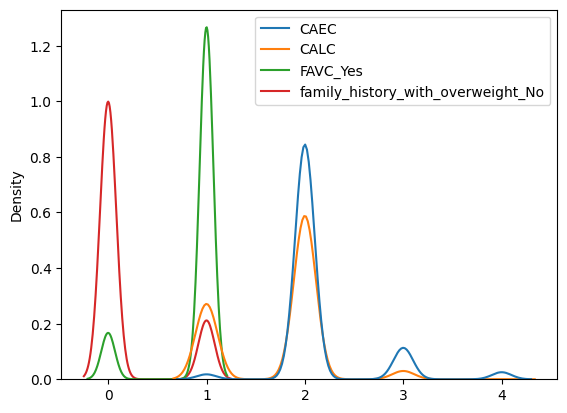

In [291]:
# curva de distribuição
sns.kdeplot(data=data_obesity_new_with_ohe[['CAEC', 'CALC', 'FAVC_Yes', 'family_history_with_overweight_No']])

### **Seleção de atributos (feature selection)**

Os atributos (X) dos dados usados para treinamento dos modelos de machine learning têm enorme influência no seu desempenho. Atributos irrelevantes ou parcialmente relevantes podem afetar negativamente o resultado do modelo, especialmente em algoritmos lineares como regressão linear e regressão logística.
O processo consiste em selecionar os atributos (X) que mais contribuem para a saída (y) e utilizá-los para treinamento do modelo, ou seja, reduzir o número de variáveis de entrada do modelo.

Vamos utilizar a seleção univariada, onde testes estatísticos são usados ​​para selecionar os atributos que tenham relação mais forte com a variável de saída, através do método **SelectKBest**.

Após a aplicação do **OHE** nas variáveis categóricas, o dataset passou a ter **25 atributos** no total. Vamos avaliar as 8 características mais importantes de acordo com a feature selection e selecionar apenas 6 delas para o treinamento do modelo.

Podemos aplicar a **padronização** antes da feature selection, para termos os dados mais escalonados.

In [292]:
# imports necessários
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

X = data_obesity_new_with_ohe.drop('NObeyesdad', axis = 1)
y = data_obesity_new_with_ohe.NObeyesdad

# aplicando a normalização
X_norm = RobustScaler().fit_transform(X)
X_norm_padr = StandardScaler().fit_transform(X_norm)

data_obesity_new_with_ohe_norm_padr = pd.DataFrame(X_norm_padr, columns=X.columns)

# features padronizadas
X = data_obesity_new_with_ohe_norm_padr
# criando um novo dataframe com X normalizado e padronizado + y
data_obesity_new_with_ohe_norm_padr = data_obesity_new_with_ohe_norm_padr.join(y)
data_obesity_new_with_ohe_norm_padr

,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,IMC,...,SMOKE_No,SMOKE_Yes,SCC_No,SCC_Yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,-0.887408,-0.872985,-0.788364,0.390906,-0.318128,-0.007810,-1.186977,0.554211,-1.411836,-0.670475,...,0.146755,-0.146755,0.219584,-0.219584,-0.528756,-0.058012,-0.072792,0.582699,-0.164520,2.0
1,-1.960788,-1.178508,1.082164,0.390906,-0.318128,1.636552,2.328908,-1.090505,0.522834,-0.688960,...,-6.814090,6.814090,-4.554073,4.554073,-0.528756,-0.058012,-0.072792,0.582699,-0.164520,2.0
2,1.044677,-0.376509,-0.788364,0.390906,-0.318128,-0.007810,1.156947,0.554211,2.457503,-0.747890,...,0.146755,-0.146755,0.219584,-0.219584,-0.528756,-0.058012,-0.072792,0.582699,-0.164520,2.0
3,1.044677,0.005395,1.082164,0.390906,-0.318128,-0.007810,1.156947,-1.090505,2.457503,-0.363194,...,0.146755,-0.146755,0.219584,-0.219584,-0.528756,-0.058012,-0.072792,-1.716153,6.078277,3.0
4,0.830001,0.112328,-0.788364,-2.225418,-0.318128,-0.007810,-1.186977,-1.090505,0.522834,-0.177412,...,0.146755,-0.146755,0.219584,-0.219584,-0.528756,-0.058012,-0.072792,0.582699,-0.164520,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,0.086470,1.701376,1.082164,0.390906,-0.318128,-0.454848,0.777546,0.400014,0.522834,1.886538,...,0.146755,-0.146755,0.219584,-0.219584,-0.528756,-0.058012,-0.072792,0.582699,-0.164520,7.0
2083,0.492788,1.790528,1.082164,0.390906,-0.318128,0.000626,0.385081,-0.104876,0.522834,1.742010,...,0.146755,-0.146755,0.219584,-0.219584,-0.528756,-0.058012,-0.072792,0.582699,-0.164520,7.0
2084,0.531665,1.788482,1.082164,0.390906,-0.318128,0.081303,0.470422,-0.027545,0.522834,1.717318,...,0.146755,-0.146755,0.219584,-0.219584,-0.528756,-0.058012,-0.072792,0.582699,-0.164520,7.0
2085,0.394745,1.775393,1.082164,0.390906,-0.318128,1.393744,0.148013,-0.126644,0.522834,1.783093,...,0.146755,-0.146755,0.219584,-0.219584,-0.528756,-0.058012,-0.072792,0.582699,-0.164520,7.0


In [293]:
data_obesity_new_with_ohe_norm_padr.describe()

,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,IMC,...,SMOKE_No,SMOKE_Yes,SCC_No,SCC_Yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
count,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2087.000000,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,...,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2087.000000,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2063.000000
mean,-1.361845e-17,-5.447381e-17,-1.361845e-17,-4.596228e-17,0.000000,-2.723690e-17,2.723690e-17,8.171071e-17,-3.404613e-18,1.089476e-16,...,-2.042768e-17,2.042768e-17,-2.723690e-17,2.723690e-17,0.000000,-6.809226e-18,6.809226e-18,-4.766458e-17,1.361845e-17,4.098885
std,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,...,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.972880
min,-2.712155e+00,-1.827745e+00,-2.658892e+00,-2.225418e+00,-2.494958,-1.652172e+00,-1.186977e+00,-1.090505e+00,-1.411836e+00,-2.089873e+00,...,-6.814090e+00,-1.467547e-01,-4.554073e+00,-2.195836e-01,-0.528756,-5.801194e-02,-7.279184e-02,-1.716153e+00,-1.645203e-01,1.000000
25%,-7.781538e-01,-7.966038e-01,-7.883642e-01,-4.856048e-03,-0.318128,-6.804829e-01,-1.041062e+00,-1.090505e+00,-1.411836e+00,-6.726728e-01,...,1.467547e-01,-1.467547e-01,2.195836e-01,-2.195836e-01,-0.528756,-5.801194e-02,-7.279184e-02,-1.716153e+00,-1.645203e-01,2.000000
50%,-1.170116e-02,-1.435055e-01,-4.713949e-02,3.909061e-01,-0.318128,-7.809793e-03,-1.501506e-02,-5.290961e-02,5.228335e-01,-1.083800e-01,...,1.467547e-01,-1.467547e-01,2.195836e-01,-2.195836e-01,-0.528756,-5.801194e-02,-7.279184e-02,5.826988e-01,-1.645203e-01,4.000000
75%,7.172047e-01,8.080017e-01,1.082164e+00,3.909061e-01,-0.318128,7.587794e-01,7.796945e-01,5.542111e-01,5.228335e-01,7.889530e-01,...,1.467547e-01,-1.467547e-01,2.195836e-01,-2.195836e-01,-0.528756,-5.801194e-02,-7.279184e-02,5.826988e-01,-1.645203e-01,6.000000
max,2.976762e+00,3.289772e+00,1.082164e+00,1.699068e+00,4.035532,1.636552e+00,2.328908e+00,2.198928e+00,4.392173e+00,2.623204e+00,...,1.467547e-01,6.814090e+00,2.195836e-01,4.554073e+00,1.891231,1.723783e+01,1.373780e+01,5.826988e-01,6.078277e+00,7.000000


In [294]:
# salvando o dataframe com OHE normalizado e padronizado
data_obesity_new_with_ohe_norm_padr.to_csv("ML_Níveis-de-obesidade_norm_padr.csv", index = False)

In [295]:
# Imports necessários
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
import numpy as np

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=8)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", data_obesity_new_with_ohe.drop('NObeyesdad', axis = 1).columns)

# Exibe as pontuações de cada atributos e os 8 escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", fit.get_feature_names_out())


Número original de atributos: 24

Número reduzido de atributos: 8

Atributos Originais: Index(['Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC',
       'IMC', 'Peso_ideal_maximo', 'family_history_with_overweight_No',
       'family_history_with_overweight_Yes', 'FAVC_No', 'FAVC_Yes', 'SMOKE_No',
       'SMOKE_Yes', 'SCC_No', 'SCC_Yes', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

Scores dos Atributos Originais: [3.744e+01 1.927e+03 1.105e+02 2.677e+01 7.755e+01 1.519e+01 1.818e+01
 7.935e+00 3.351e+01 9.933e+03 3.792e+01 1.457e+02 1.457e+02 4.320e+01
 4.320e+01 5.373e+00 5.373e+00 2.266e+01 2.266e+01 2.759e+01 2.559e+00
 3.275e+00 2.670e+01 1.716e+01]

Atributos Selecionados: ['Weight' 'FCVC' 'CAEC' 'IMC' 'family_history_with_overweight_No'
 'family_history_with_overweight_Yes' 'FAVC_No' 'FAVC_Yes']


Vamos utilizar a **eliminação recursiva de atributos**, onde os atributos são removidos recursivamente e vai sendo construído um modelo com os que permanecem, usando o resultado do modelo (por exemplo, a acurácia) para identificar quais atributos mais contribuem para a predição da variável de saída.

In [296]:
# Eliminação Recursiva de Atributos

# Imports necessários
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=8)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", data_obesity_new_with_ohe.drop('NObeyesdad', axis = 1).columns)

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados" e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out())

Atributos Originais: Index(['Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC',
       'IMC', 'Peso_ideal_maximo', 'family_history_with_overweight_No',
       'family_history_with_overweight_Yes', 'FAVC_No', 'FAVC_Yes', 'SMOKE_No',
       'SMOKE_Yes', 'SCC_No', 'SCC_Yes', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

Atributos Selecionados: [ True  True  True  True False False False False  True  True  True False
 False False False False False False False False False False  True False]

Ranking de atributos: [ 1  1  1  1  5  4  9 10  1  1  1  6  2  7 11 15 17 13 16  3 12 14  1  8]

Qtd de melhores Atributos: 8

Nomes dos Atributos Selecionados: ['Height' 'Weight' 'FCVC' 'NCP' 'CALC' 'IMC' 'Peso_ideal_maximo'
 'MTRANS_Public_Transportation']


Por último, vamos utilizar a técnica de **importância de atributos**, onde são utilizados algoritmos de Machine Learning (como **Random Forest** ou **Extra Trees**) para estimar a importância dos atributos, fazendo uma pré-seleção.

In [297]:
# Importância de Atributos com ExtraTrees

# Imports necessários
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("Atributos Originais:", data_obesity_new_with_ohe.drop('NObeyesdad', axis = 1).columns)

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)

Atributos Originais: Index(['Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC',
       'IMC', 'Peso_ideal_maximo', 'family_history_with_overweight_No',
       'family_history_with_overweight_Yes', 'FAVC_No', 'FAVC_Yes', 'SMOKE_No',
       'SMOKE_Yes', 'SCC_No', 'SCC_Yes', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')
[0.054 0.174 0.068 0.044 0.027 0.036 0.038 0.039 0.046 0.285 0.057 0.022
 0.02  0.013 0.012 0.003 0.004 0.006 0.007 0.019 0.001 0.001 0.021 0.004]


Os atributos considerados mais relevantes pela técnica de importância de atributos foram: **'Height', 'Weight', 'FCVC', 'NCP', 'TUE', 'CALC', 'IMC',	 'Peso_ideal_maximo'**.

De acordo com a seleção de caraterísticas e conforme o contexto do dataset, os atributos em comum selecionados pelas técnicas expostas acima em sua maioria foram: '**Weight**', '**FCVC**', '**CAEC**', '**IMC**', '**Peso_ideal_maximo**',
 '**family_history_with_overweight_No**', '**family_history_with_overweight_Yes**' e '**FAVC_Yes**'.

Com isso, vamos avaliar novamente a correlação desses atributos selecionados e poder identificar quais seriam os mais adequados para o treinamento do modelo.

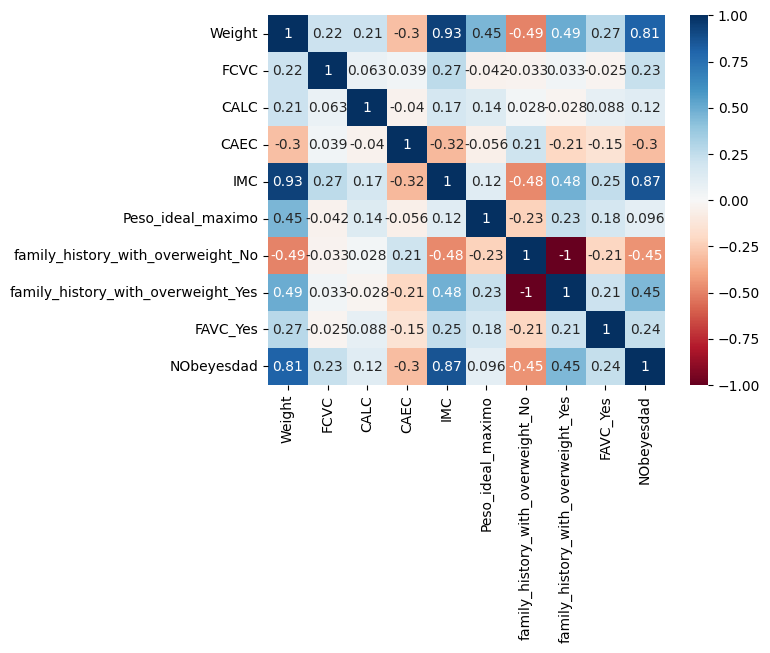

In [298]:
# gráfico de correlação com Seaborn
sns.heatmap(data_obesity_new_with_ohe_norm_padr[['Weight', 'FCVC', 'CALC', 'CAEC', 'IMC', 'Peso_ideal_maximo',
 'family_history_with_overweight_No', 'family_history_with_overweight_Yes', 'FAVC_Yes', 'NObeyesdad']].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Conforme a seleção de características e a análise da correlação desses atributos selecionados, podemos sugerir o seguinte conjunto de atributos para utilização no modelo de Machine Learning:

'**Weight**', '**CAEC**', '**IMC**', '**Peso_ideal_maximo**',
 '**family_history_with_overweight_No**', '**FAVC_Yes**'

 Por essa análise, o método que fez a melhor escolha de atributos dado o contexto do dataset e a correlação das variáveis foi o **SelectKBest**.

Montagem do dataset final somente com os atributos relevantes selcionados, e esse será o dataset utilizado até o final do MVP para o treinamento dos modelos.

In [299]:
# montando o novo dataframe somente com as características selecionadas pela feature selection e com dados originais
df_obesity_FINAL_with_feature_selection = pd.DataFrame(data_obesity_new_with_ohe[['Weight', 'CAEC', 'IMC', 'Peso_ideal_maximo',
 'family_history_with_overweight_No', 'FAVC_Yes', 'NObeyesdad']])

In [300]:
df_obesity_FINAL_with_feature_selection

,Weight,CAEC,IMC,Peso_ideal_maximo,family_history_with_overweight_No,FAVC_Yes,NObeyesdad
0,64.000000,2,24.386526,65.610000,0.0,0.0,2
1,56.000000,2,24.238227,57.760000,0.0,0.0,2
2,77.000000,2,23.765432,81.000000,0.0,0.0,2
3,87.000000,2,26.851852,81.000000,1.0,0.0,3
4,89.800000,2,28.342381,79.210000,1.0,0.0,4
...,...,...,...,...,...,...,...
2106,131.408528,2,44.901475,73.164928,0.0,1.0,7
2107,133.742943,2,43.741923,76.438650,0.0,1.0,7
2108,133.689352,2,43.543817,76.755647,0.0,1.0,7
2109,133.346641,2,44.071535,75.642158,0.0,1.0,7


In [301]:
# salvando o dataframe com feature selection
df_obesity_FINAL_with_feature_selection.to_csv("ML_Níveis-de-obesidade_Versão-Final_original_with_feature_selection.csv", index = False)

Avaliando novamente possíveis outliers no dataset com transformação de dados.

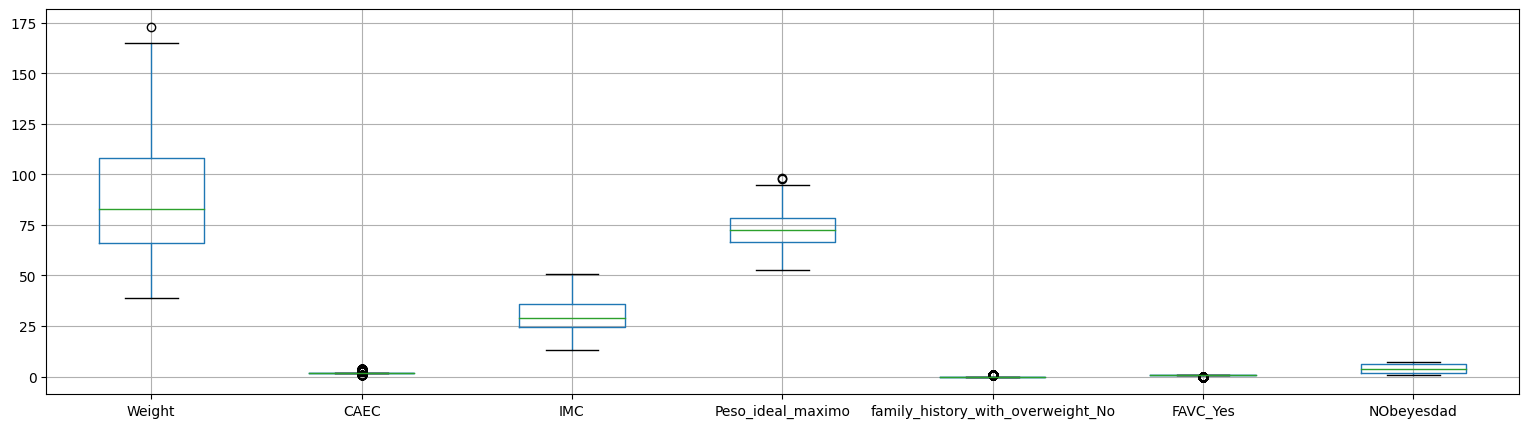

In [302]:
plt.figure(figsize =(19, 5))
df_obesity_FINAL_with_feature_selection.boxplot(column=list(df_obesity_FINAL_with_feature_selection.columns))
plt.show()

Dentro do **gráfico de violino** temos o próprio boxplot. A vantagem do uso do **ViolinPlot** é que, além das informações que o boxplot já traz consigo, existe a exibição da densidade dos dados. Na figura, a área formada em torno do boxplot representa a distribuição dos dados. Os locais de maior área (onde é mais “gordo” o gráfico), existe uma grande concentração de dados, enquanto em locais de menor área (onde o gráfico é mais “fino”) existe uma baixa concentração de dados.

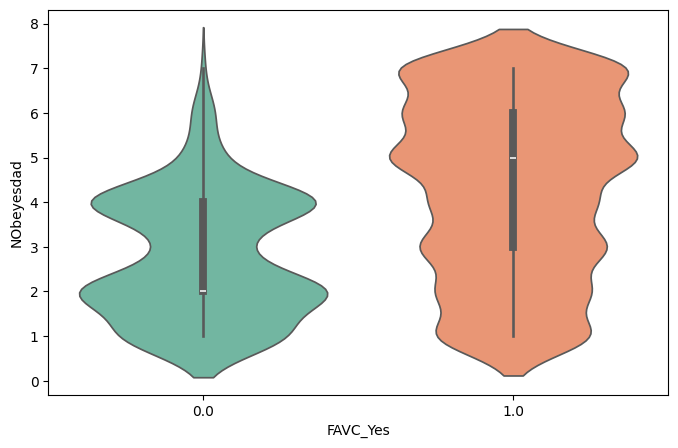

In [303]:
# atributo FAVC_Yes
plt.figure(figsize=(8,5))
sns.violinplot(x='FAVC_Yes', y='NObeyesdad', palette='Set2', data=df_obesity_FINAL_with_feature_selection)
plt.show()

Ter o hábito de consumo de alimentos altamente calóricos (**FAVC**) tem maior densidade para os níveis de obesidade a partir de 5 e não ter esse hábito tem maior densidade para os níveis mais baixos de obesidade, inferior a 3.

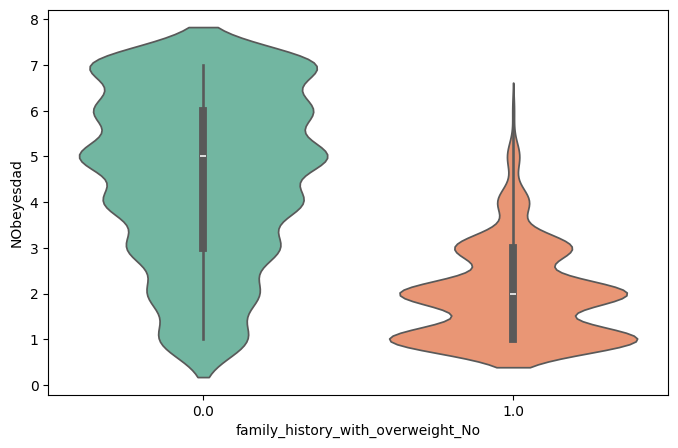

In [304]:
# atributo family_history_with_overweight_No
plt.figure(figsize=(8,5))
sns.violinplot(x='family_history_with_overweight_No', y='NObeyesdad',palette='Set2', data=df_obesity_FINAL_with_feature_selection)
plt.show()

**Não ter o histórico familiar de sobrepeso** tem maior influência para os níveis mais baixos de obesidade, enquanto ter o **histórico familiar de sobrepeso** tem maior influência para os níveis mais altos de obesidade.

Avaliando graficamente a dispersão dos dados para os atributos selecionados pela feature selection.

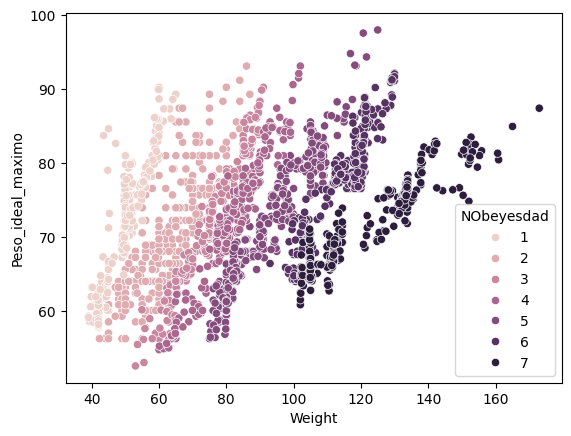

In [305]:
# scatter plot com Seaborn colorido por classes
sns.scatterplot(x='Weight', y='Peso_ideal_maximo', hue='NObeyesdad', data=df_obesity_FINAL_with_feature_selection);

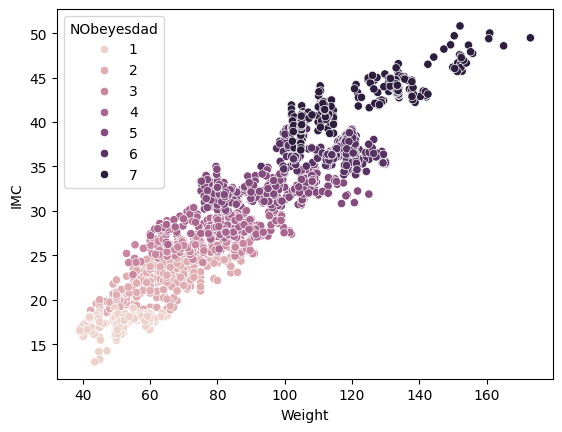

In [306]:
# scatter plot com Seaborn colorido por classes
sns.scatterplot(x='Weight', y='IMC', hue='NObeyesdad', data=df_obesity_FINAL_with_feature_selection);

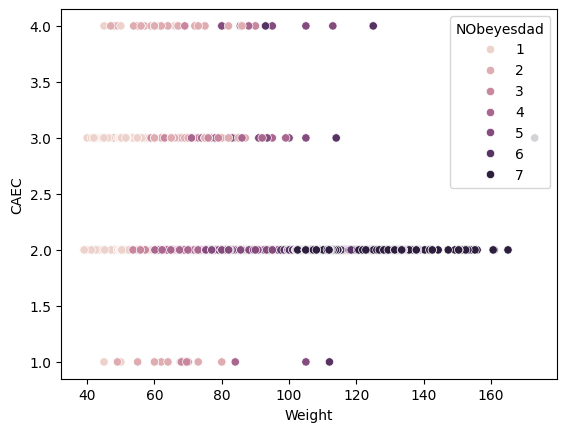

In [307]:
sns.scatterplot(x='Weight', y='CAEC', hue='NObeyesdad', data=df_obesity_FINAL_with_feature_selection);

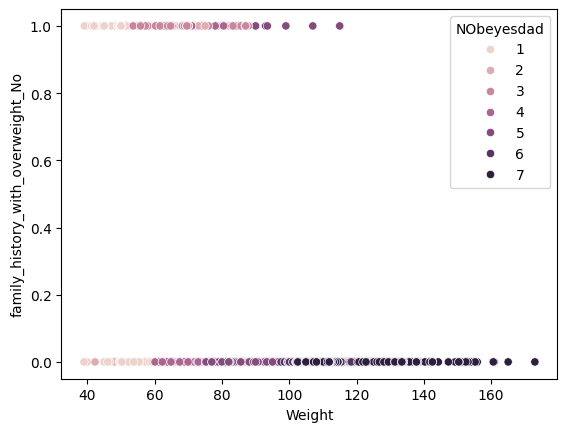

In [308]:
sns.scatterplot(x='Weight', y='family_history_with_overweight_No', hue='NObeyesdad', data=df_obesity_FINAL_with_feature_selection);

Avaliando as relações dos atributos selecionados e a variável target.

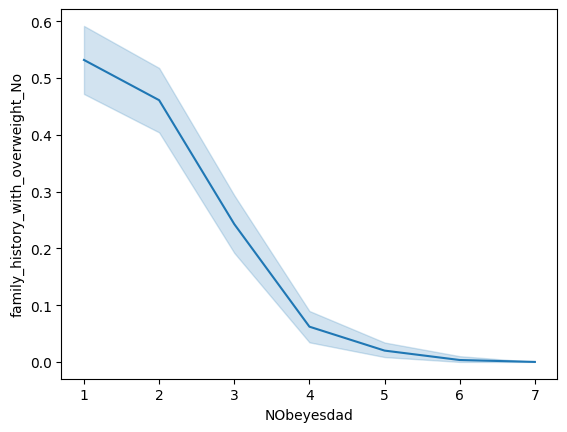

In [309]:
sns.lineplot(x='NObeyesdad', y='family_history_with_overweight_No',data=df_obesity_FINAL_with_feature_selection)
plt.show()

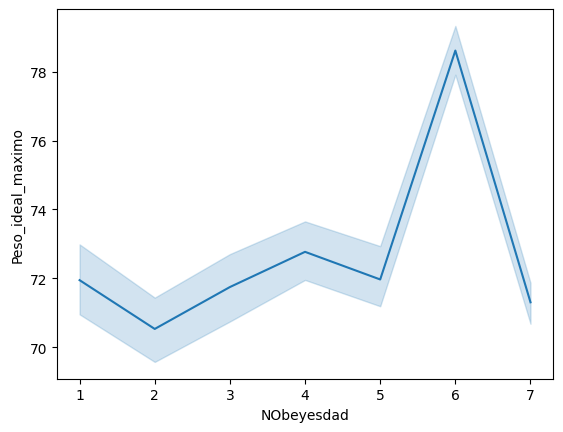

In [310]:
sns.lineplot(x='NObeyesdad', y='Peso_ideal_maximo',data=df_obesity_FINAL_with_feature_selection)
plt.show()

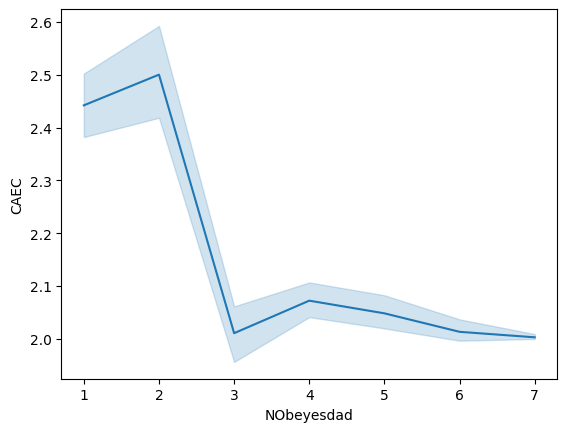

In [311]:
sns.lineplot(x='NObeyesdad', y='CAEC',data=df_obesity_FINAL_with_feature_selection)
plt.show()

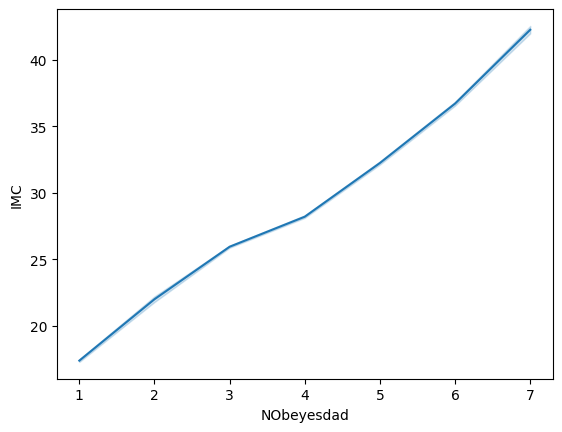

In [312]:
sns.lineplot(x='NObeyesdad', y='IMC',data=df_obesity_FINAL_with_feature_selection)
plt.show()

Embora as classes estejam balanceadas no dataset, a distribuição de alguns atributos não está proporcional às classes alvo, como podemos ver abaixo. Por exemplo, o atributo '**Weight**' tem poucos registros acima de **140 Kg**. Porém, esses outliers não significam um viés no dataset, pois não são dados errôneos, mas refletem a realidade de uma minoria da população que apresenta valores mais discrepantes de peso. Por isso será importante usar uma separação entre dados de treino e teste que seja estratificada, para manter a mesma proporção dos dados tanto no treinamento como no teste.



In [313]:
Weight_proportions = df_obesity_FINAL_with_feature_selection.groupby(['NObeyesdad'])['Weight'].value_counts(normalize=True)
print(Weight_proportions)

NObeyesdad  Weight    
1           50.000000     0.112360
            42.000000     0.067416
            45.000000     0.044944
            60.000000     0.026217
            52.000000     0.018727
                            ...   
7           102.555691    0.003086
            102.686908    0.003086
            102.781971    0.003086
            102.874549    0.003086
            102.320437    0.003086
Name: proportion, Length: 1598, dtype: float64


In [314]:
# Peso maior que 140 Kg
Weight_maior_igual_a_140 = pd.to_numeric(data_obesity['Weight'], errors="coerce") >= 140.00
Weight_maior_igual_a_140.value_counts()

Weight
False    2078
True       33
Name: count, dtype: int64

In [315]:
# Proporção do Weight com relação às classes alvo
Weight_proportions = df_obesity_FINAL_with_feature_selection.groupby(['NObeyesdad'])['Weight'].value_counts(normalize=True)
print(Weight_proportions)

NObeyesdad  Weight    
1           50.000000     0.112360
            42.000000     0.067416
            45.000000     0.044944
            60.000000     0.026217
            52.000000     0.018727
                            ...   
7           102.555691    0.003086
            102.686908    0.003086
            102.781971    0.003086
            102.874549    0.003086
            102.320437    0.003086
Name: proportion, Length: 1598, dtype: float64


Avaliando a proporcionalidade dos atributos selecionados através da feature selection com relação às classes alvo.

In [316]:
# Peso máximo maior igual a 90Kg
Peso_ideal_maximo_maior_igual_a_90 = pd.to_numeric(data_obesity['Peso_ideal_maximo'], errors="coerce") >= 90.00
Peso_ideal_maximo_maior_igual_a_90.value_counts()

Peso_ideal_maximo
False    2082
True       29
Name: count, dtype: int64

In [317]:
# Proporcionalidade do atributo FAVC_Yes
FAVC_Yes_proportions = df_obesity_FINAL_with_feature_selection.groupby(['NObeyesdad'])['FAVC_Yes'].value_counts(normalize=True)
print(FAVC_Yes_proportions)

NObeyesdad  FAVC_Yes
1           1.0         0.812734
            0.0         0.187266
2           1.0         0.723404
            0.0         0.276596
3           1.0         0.920290
            0.0         0.079710
4           1.0         0.744828
            0.0         0.255172
5           1.0         0.968661
            0.0         0.031339
6           1.0         0.976431
            0.0         0.023569
7           1.0         0.996914
            0.0         0.003086
Name: proportion, dtype: float64


In [318]:
# Proporcionalidade do atributo family_history_with_overweight_No
family_history_with_overweight_No_proportions = df_obesity_FINAL_with_feature_selection.groupby(['NObeyesdad'])['family_history_with_overweight_No'].value_counts(normalize=True)
print(family_history_with_overweight_No_proportions)

NObeyesdad  family_history_with_overweight_No
1           1.0                                  0.531835
            0.0                                  0.468165
2           0.0                                  0.539007
            1.0                                  0.460993
3           0.0                                  0.757246
            1.0                                  0.242754
4           0.0                                  0.937931
            1.0                                  0.062069
5           0.0                                  0.980057
            1.0                                  0.019943
6           0.0                                  0.996633
            1.0                                  0.003367
7           0.0                                  1.000000
Name: proportion, dtype: float64


In [319]:
# Proporcionalidade do atributo CAEC
CAEC_proportions = df_obesity_FINAL_with_feature_selection.groupby(['NObeyesdad'])['CAEC'].value_counts(normalize=True)
print(CAEC_proportions)

NObeyesdad  CAEC
1           2       0.543071
            3       0.438202
            1       0.011236
            4       0.007491
2           2       0.553191
            3       0.287234
            4       0.124113
            1       0.035461
3           2       0.855072
            1       0.076087
            3       0.050725
            4       0.018116
4           2       0.931034
            3       0.055172
            4       0.010345
            1       0.003448
5           2       0.962963
            4       0.017094
            3       0.017094
            1       0.002849
6           2       0.986532
            4       0.006734
            1       0.003367
            3       0.003367
7           2       0.996914
            3       0.003086
Name: proportion, dtype: float64


### **Implementando o holdout com estratificação**

Como esse dataset de níveis de obesidade está balanceado e não contém muitos dados, não existe a necessidade de se utilizar uma validação cruzada, então optou-se por realizar a divisão da base em treino e teste utilizando o holdout com estratificação.

***A ideia é treinar um modelo de classificação que seja capaz de avaliar corretamente qual é o nível de obesidade de uma pessoa baseada nos 6 atributos selecionados no processo de feature selection.***

In [320]:
# Imports necessários
from sklearn.model_selection import train_test_split

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
X = df_obesity_FINAL_with_feature_selection.drop(['NObeyesdad'], axis=1)
y = df_obesity_FINAL_with_feature_selection.NObeyesdad

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))
print("y_train: " + str(y_train.shape))
print("y_test: " + str(y_test.shape))

X_train: (1669, 6)
X_test: (418, 6)
y_train: (1669,)
y_test: (418,)


Verifica-se nos dados de treino e teste que as classes alvo estão balanceadas.

In [321]:
y_train.value_counts()

NObeyesdad
5    281
7    259
6    237
4    232
2    225
3    221
1    214
Name: count, dtype: int64

In [322]:
y_test.value_counts()

NObeyesdad
5    70
7    65
6    60
4    58
2    57
3    55
1    53
Name: count, dtype: int64

### **Pipelines**

A sequência de componentes de processamento de dados se chama *pipeline* de dados. Os pipelines são muito comuns em sistemas de aprendizado de máquina, uma vez que existem muitos dados para manipular e muitas mudanças nos dados.

A **regressão logística** é um algoritmo utilizado para problemas de classificação. A regressão logística calcula a probabilidade de ocorrência (p) de um evento, ou seja, seus valores de saída estão entre 0 e 1, e essa saída é mapeada na classe correspondente.

Para evitar um problema conhecido como **data leakage** (vazamento de dados) temos que aplicar a normalização e padronização dos dados, conforme o caso, apenas para os dados de treino e após para os dados de teste.



> Aplicando o modelo da **Regressão logística**.



In [323]:
# Imports necessários
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # Padronização dos dados
from sklearn.linear_model import LogisticRegression

In [324]:
# Pipeline para normalização, padronização dos dados e aplicação do modelo da Regressão logística
full_pipeline_RL_norm_padr = Pipeline([('norm_scaler', RobustScaler()),
                             ('std_scaler', StandardScaler()),
                             ('RL', LogisticRegression(max_iter=200))])

print("Acurácia Regressão Logística - dados de treino (Normalizado e Padronizado) \n")
full_pipeline_RL_norm_padr.fit(X_train, y_train).score(X_train, y_train)

Acurácia Regressão Logística - dados de treino (Normalizado e Padronizado) 



0.9059316956261234

In [325]:
# Pipeline para padronização dos dados e aplicação do modelo da Regressão logística
full_pipeline_RL_padr = Pipeline([('std_scaler', StandardScaler()),
                             ('RL', LogisticRegression(max_iter=200))])

print("Acurácia Regressão Logística - dados de treino (Padronizado) \n")
full_pipeline_RL_padr.fit(X_train, y_train).score(X_train, y_train)

Acurácia Regressão Logística - dados de treino (Padronizado) 



0.9059316956261234

Verifica-se que o modelo de RL apresentou a mesma acurácia para dados normalizados e padronizados e somente padronizados, portanto, na execução das predições com dados de teste usaremos somente o comparativo de dados originais com dados padronizados.

In [326]:
# treinando a regressão logística com os dados originais
modelo_RL = LogisticRegression(max_iter=200)

print("Acurácia Regressão Logística - dados de treino (SEM Padronização) \n")
modelo_RL.fit(X_train, y_train).score(X_train, y_train)

Acurácia Regressão Logística - dados de treino (SEM Padronização) 



0.9550629119233074

In [327]:
print("X_test[0:5] \n" + str(X_test[0:5]) + "\n")
print("y_test[:5] \n" + str(y_test[:5]))

X_test[0:5] 
         Weight  CAEC        IMC  Peso_ideal_maximo  \
919   78.429312     2  26.200064          74.836946   
752   86.413388     2  25.103133          86.058369   
992   69.743323     2  28.298983          61.612923   
1161  79.863546     2  28.889298          69.111705   
1077  80.000000     2  28.909440          69.181555   

      family_history_with_overweight_No  FAVC_Yes  
919                                 0.0       1.0  
752                                 0.0       1.0  
992                                 0.0       0.0  
1161                                0.0       0.0  
1077                                0.0       1.0  

y_test[:5] 
919     3
752     3
992     4
1161    4
1077    4
Name: NObeyesdad, dtype: int64


**Regressão Logística** com dados de teste, comparando dados padronizados e originais.

In [328]:
# Imports necessários
from sklearn.metrics import accuracy_score

# Regressão Logística com dados originais
modelo_RL.fit(X_train, y_train)
predictions = modelo_RL.predict(X_test)
print("Acurácia Regressão Logística - dados de teste (Dados originais) \n")
print(accuracy_score(y_test, predictions))

Acurácia Regressão Logística - dados de teste (Dados originais) 

0.9521531100478469


In [329]:
predictions = modelo_RL.predict(X_test[0:5])
predictions

array([3, 3, 4, 4, 4])

In [330]:
full_pipeline_RL_padr.fit(X_train, y_train).score(X_train, y_train)

predictions = full_pipeline_RL_padr.predict(X_test)
print("Acurácia Regressão Logística - dados de teste (Dados padronizados) \n")
print(accuracy_score(y_test, predictions))

Acurácia Regressão Logística - dados de teste (Dados padronizados) 

0.9019138755980861


In [331]:
predictions = full_pipeline_RL_padr.predict(X_test[0:5])
predictions

array([3, 3, 4, 4, 4])

Todas as predições acima foram corretas para as 5 primeiras linhas dos dados de teste.



> **Matriz de confusão**

Uma forma bem melhor de avaliar o desempenho de um classificador é analisar a matriz de confusão. A ideia geral é contabilizar o número de vezes que as instâncias da classe A são classificadas como classe B. Cada linha em uma matriz de confusão representa uma classe real, ao passo que cada coluna representa uma classe prevista.



> **Matriz de confusão** (**Regressão Logística**)



In [332]:
# Imports necessários
from sklearn.metrics import confusion_matrix

# Predições com o modelo Regressão Logística
full_pipeline_RL_padr.fit(X_train, y_train)
predictions = full_pipeline_RL_padr.predict(X_test)

print("Matriz de confusão Regressão Logística - dados de teste (Dados Padronizados)")
# matriz de confusão
conf_mx = confusion_matrix(y_test, predictions)
conf_mx

Matriz de confusão Regressão Logística - dados de teste (Dados Padronizados)


array([[53,  0,  0,  0,  0,  0,  0],
       [ 7, 44,  6,  0,  0,  0,  0],
       [ 0,  5, 48,  2,  0,  0,  0],
       [ 0,  0,  4, 51,  3,  0,  0],
       [ 0,  0,  0,  1, 67,  2,  0],
       [ 0,  0,  0,  0,  1, 53,  6],
       [ 0,  0,  0,  0,  0,  4, 61]])

In [333]:
# Imports necessários
from sklearn.metrics import confusion_matrix

# Predições com o modelo Regressão Logística
modelo_RL.fit(X_train, y_train)
predictions = modelo_RL.predict(X_test)

print("Matriz de confusão Regressão Logística - dados de teste (Dados Originais) \n")
# matriz de confusão
conf_mx = confusion_matrix(y_test, predictions)
conf_mx

Matriz de confusão Regressão Logística - dados de teste (Dados Originais) 



array([[53,  0,  0,  0,  0,  0,  0],
       [ 2, 53,  2,  0,  0,  0,  0],
       [ 0,  1, 51,  3,  0,  0,  0],
       [ 0,  0,  1, 57,  0,  0,  0],
       [ 0,  0,  0,  0, 69,  1,  0],
       [ 0,  0,  0,  0,  1, 54,  5],
       [ 0,  0,  0,  0,  0,  4, 61]])

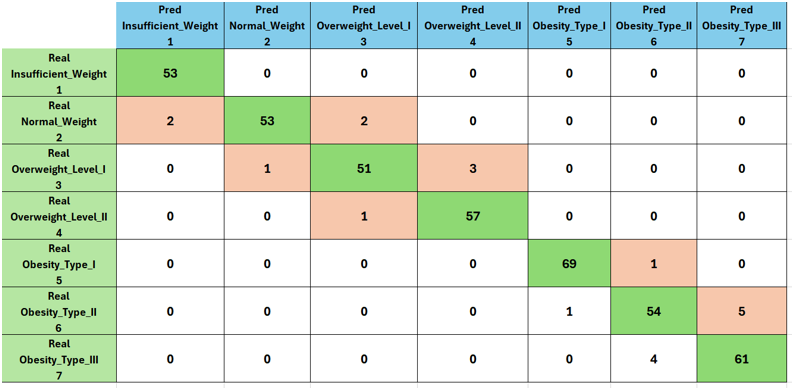

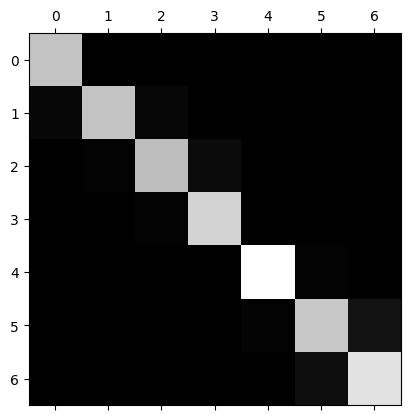

In [334]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Verificando a acurácia e a matriz de confusão pela **validação cruzada** com os dados de treinamento, e utilizando o método **cross_val_predict**, que permite obter as predições do modelo ao invés de apenas as métricas finais. Neste caso, cada predição será obtida para o conjunto de teste de cada uma das partições. Em outras palavras, se **cv=5**, por exemplo, o modelo vai ser treinado para **4 partições e testado em 1**, que gera as predições.

In [335]:
# Imports necessários
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 5
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# regressão Logística com dados padronizados
predictions = cross_val_predict(full_pipeline_RL_padr, X_train, y_train, cv=kfold)

conf_mx = confusion_matrix(y_train, predictions)
print("Matriz de confusão - Regressão Logística (Validação Cruzada) - Dados padronizados \n")
print(conf_mx)

Matriz de confusão - Regressão Logística (Validação Cruzada) - Dados padronizados 

[[214   0   0   0   0   0   0]
 [ 26 175  23   1   0   0   0]
 [  0  17 188  16   0   0   0]
 [  0   0  23 198  11   0   0]
 [  0   0   0   9 259  13   0]
 [  0   0   0   0   6 213  18]
 [  0   0   0   0   0  13 246]]


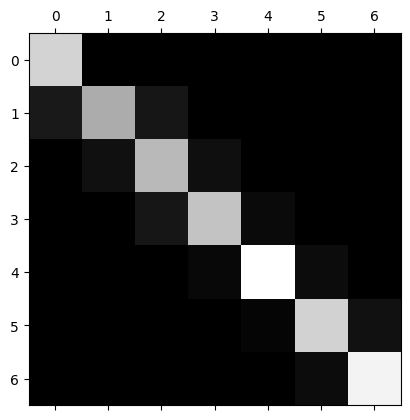

In [336]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [337]:
# Imports necessários
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 5
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# Regressão Logística com dados originais
predictions = cross_val_predict(modelo_RL, X_train, y_train, cv=kfold)

print("Matriz de confusão - Regressão Logística (Validação Cruzada) - Dados originais \n")
conf_mx = confusion_matrix(y_train, predictions)
print(conf_mx)

Matriz de confusão - Regressão Logística (Validação Cruzada) - Dados originais 

[[212   2   0   0   0   0   0]
 [  8 211   6   0   0   0   0]
 [  0   5 204  12   0   0   0]
 [  0   0   9 219   4   0   0]
 [  0   0   0   4 273   4   0]
 [  0   0   0   0   7 216  14]
 [  0   0   0   0   0  16 243]]


Verifica-se que a performance do modelo de RL se adaptou melhor com os **dados originais** do que com os dados padronizados, conforme podemos observar pelo comparativo abaixo:

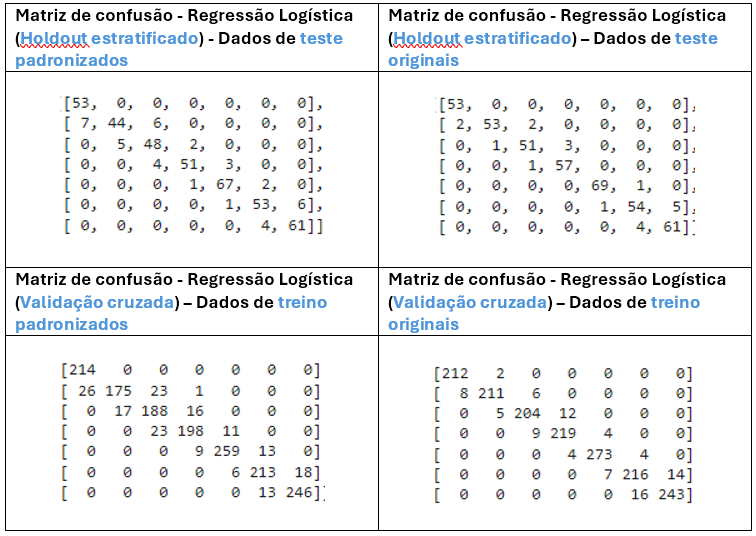

# Modelagem e treinamento

Quando construímos um modelo de aprendizado supervisionado, estamos interessados na generalização, etapa em que aplicamos um modelo aos dados que não foram utilizados para construí-lo, ou seja, novos dados.

O modelo deve capturar as regularidades dos dados de treinamento, mas também generalizar bem para dados desconhecidos. Isto é conhecido como dilema **bias X variância**, e fala da importância do equlíbrio entre **underfitting** e **overfitting**.

O **Bias** em um modelo de aprendizado de máquina refere-se à simplificação excessiva do modelo, resultando em suposições errôneas sobre os dados. Um modelo com alto viés tende a subestimar a complexidade dos dados e pode levar a um desempenho insatisfatório. Em outras palavras, um modelo com alto viés não consegue capturar as nuances e padrões sutis presentes nos dados de treinamento.

A **Variância** em um modelo de aprendizado de máquina refere-se à sensibilidade excessiva do modelo aos dados de treinamento específicos. Um modelo com alta variância se ajusta muito bem aos dados de treinamento, mas tem dificuldade em generalizar para novos dados. Em outras palavras, um modelo com alta variância pode se tornar superajustado aos dados de treinamento, capturando ruídos e variações aleatórias em vez de padrões reais.

### **Algoritmos de Machine Learning**

Nesta seção, serão apresentados alguns algoritmos de Machine Learning que podem ser usados para problemas de classificação.



> **KNN**

O algoritmo KNN (K-Nearest Neighbors ou K-Vizinhos Mais Próximos) é não paramétrico, ele não assume premissas sobre a distribuição dos dados, e funciona muito bem na prática para problemas de classificação. Sua ideia principal é considerar que os exemplos vizinhos são similares ao exemplo cuja informação se deseja inferir.

O KNN utiliza uma métrica de distância para encontrar as K instâncias mais semelhantes nos dados de treinamento para uma nova instância e considera o resultado dos vizinhos como a previsão (a classe mais comum em problemas de classificação).

> **Árvore de decisão**

A árvore de decisão é um dos modelos preditivos mais simples de ser interpretado. Uma de suas principais vantagens é apresentar a informação visualmente de uma forma fácil de entender pelo ser humano. Basicamente, uma árvore de decisão usa amostras das características dos dados para criar regras de decisão no formato de árvore, isto é, reduz os dados em um conjunto de regras que podem ser usadas para uma decisão.

> **Naive Bayes**

O Naive Bayes, ou Bayes Ingênuo é um classificador genérico e de aprendizado dinâmico, sendo um dos métodos mais utilizados para classificação.

Esse método é chamado de ingênuo (naive, em inglês) porque desconsidera completamente a correlação entre os atributos (características), tratando cada um de forma independente. Além disso o nome do método contém a palavra Bayes porque é baseado no Teorema de Bayes, que determina a probabilidade de um evento com base em um conhecimento prévio (a priori) que pode estar relacionado a este evento.

> **SVM**

O SVM (Support Vector Machine, ou máquina de vetor de suporte) é um dos algoritmos mais efetivos para calssificação, e pode ser aplicado em dados lineares e não lineares. O treinamento dos modelos de SVM costuma ser lento, mas esses modelos exigem poucos ajustes, tendem a apresentar boa acurácia e conseguem modelar fronteiras de decisão complexas e não lineares.

Especialmente, o SVM realiza um mapeamento não linear para transformar os dados de treino originais em uma dimensão maior. Nessa nova dimensão, o algoritmo busca pelo hiperplano que separa os dados linearmente de forma ótima. Com um mapeamento apropriado para uma dimensão suficientemente alta, dados de duas classes podem ser sempre separados por um hiperplano.


> **Regressão Logística**

A regressão logística é um algoritmo utilizado especialmente para problema de classificação, e seu funcionamento lembra muito o funcionamento do algoritmo de regressão linear.

Internamente, a regressão logística calcula a probabilidade de ocorrência (p) de um evento, ou seja, seus valores de saída estão entre 0 e 1, e essa saída é mapeada na classe correspondente.









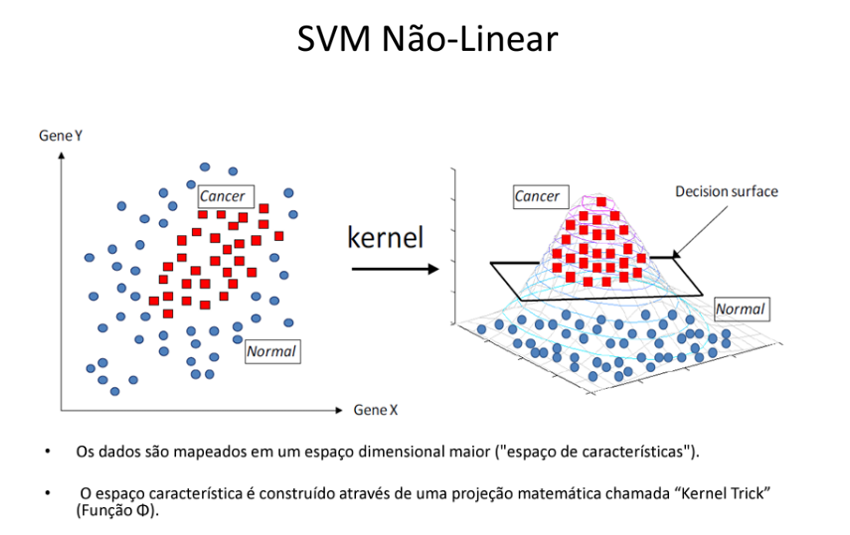

**Fonte:** Aula 14 – Support Vector Machines (SVM) - Prof. Augusto Baffa

#### **Entropia** e ganho de informação

**Entropia** pode ser definida como a medida que nos diz o quanto nossos dados estão desorganizados e misturados. Quanto **maior a entropia**, **menor o ganho de informação** e vice-versa. Nossos dados ficam menos entrópicos conforme dividimos os dados em conjuntos capazes de representar apenas uma classe do nosso modelo.

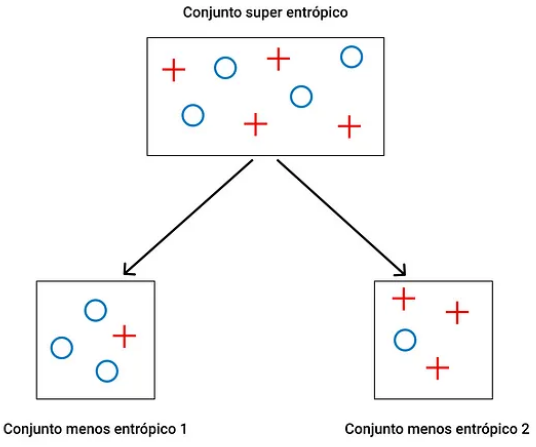

**Fonte:** Site Medium - Como Funciona uma Árvore de Decisão.

### **Treinando os algoritmos**

Iniciaremos agora a etapa de modelagem e inferência, mas não sabemos de antemão quais algoritmos perfomarão bem neste conjunto de dados. Assim, usaremos tanto a avaliação por **holdout estratificado** quanto a **validação cruzada** para treinar e avaliar os modelos usando a métrica acurácia. A **acurácia** é uma das métricas mais utilizadas para problemas de classificação, é a taxa de acerto do classificador. Esta é uma métrica útil quando os erros nas predições de todas as classes são igualmente importantes, que é o caso das classes de níveis de obesidade. Primeiramente, vamos avaliar os algoritmos com a configuração padrão de hiperparâmetros do Scikit-learn.

Nessa primeira análise dos algoritmos de Machine Learning será feita a aplicação tanto da **normalização** quanto da **padronização** de dados, e com isso avaliar a performance dos modelos em comparação com os **dados originais**.

Dados de treino: 

LR-orig: (fit Score) 0.955
LR-orig: (Cross Validation Score) 0.951457 (0.015988)
KNN-orig: (fit Score) 0.974
KNN-orig: (Cross Validation Score) 0.958055 (0.013668)
CART-orig: (fit Score) 1.000
CART-orig: (Cross Validation Score) 0.965244 (0.008821)
NB-orig: (fit Score) 0.784
NB-orig: (Cross Validation Score) 0.766323 (0.049760)
SVM-orig: (fit Score) 0.878
SVM-orig: (Cross Validation Score) 0.866391 (0.025810)
LR-norm: (fit Score) 0.875
LR-norm: (Cross Validation Score) 0.866380 (0.019734)
KNN-norm: (fit Score) 0.935
KNN-norm: (Cross Validation Score) 0.906533 (0.020596)
CART-norm: (fit Score) 1.000
CART-norm: (Cross Validation Score) 0.962247 (0.010417)
NB-norm: (fit Score) 0.703
NB-norm: (Cross Validation Score) 0.678862 (0.067543)
SVM-norm: (fit Score) 0.945
SVM-norm: (Cross Validation Score) 0.930492 (0.017003)
LR-norm-padr: (fit Score) 0.906
LR-norm-padr: (Cross Validation Score) 0.895743 (0.017411)
KNN-norm-padr: (fit Score) 0.935
KNN-norm-padr: (Cross Validatio

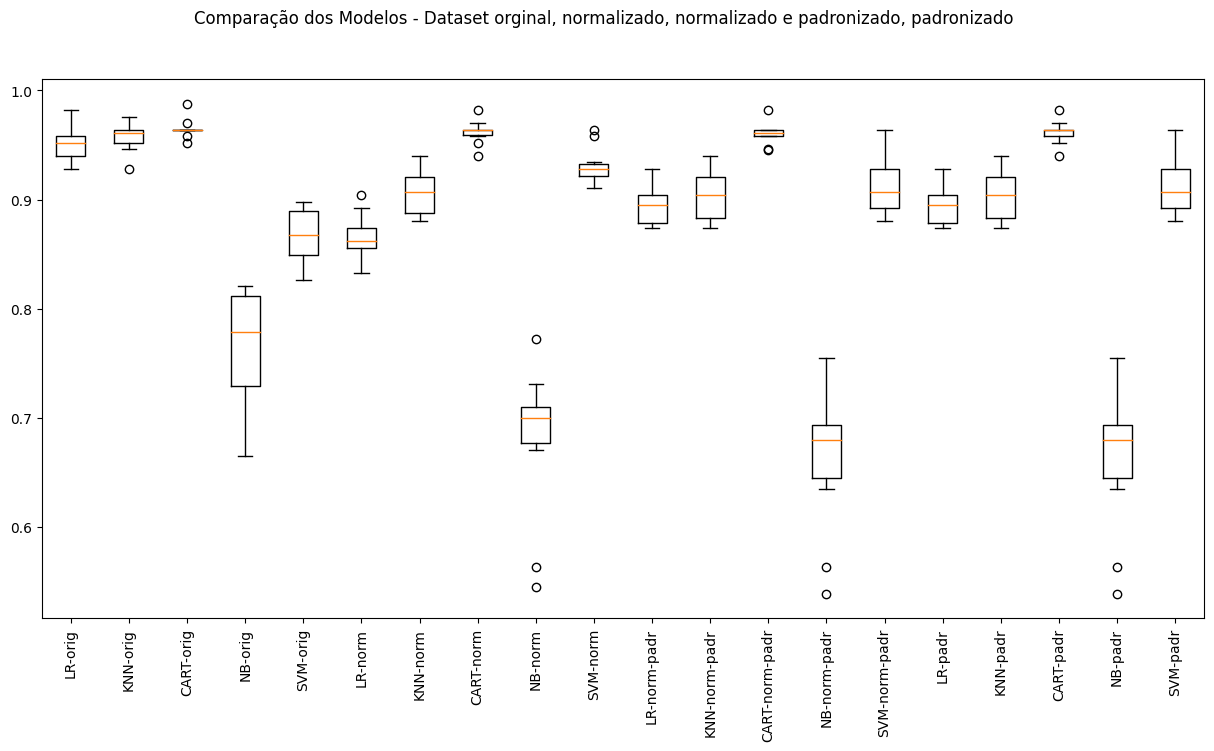

In [338]:
# Imports necessários
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Aqui vamos utilizar a validação cruzada apenas para comparação dos modelos
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines_ML = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas - Normalização e Padronização de dados
norm_scaler = ('NormScaler', RobustScaler())
standard_scaler = ('StandardScaler', StandardScaler())

# Pipelines - sklearn:
# Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit.

# Dataset original
pipelines_ML.append(('LR-orig', Pipeline([reg_log])))
pipelines_ML.append(('KNN-orig', Pipeline([knn])))
pipelines_ML.append(('CART-orig', Pipeline([cart])))
pipelines_ML.append(('NB-orig', Pipeline([naive_bayes])))
pipelines_ML.append(('SVM-orig', Pipeline([svm])))

# Dataset normalizado
pipelines_ML.append(('LR-norm', Pipeline([norm_scaler, reg_log])))
pipelines_ML.append(('KNN-norm', Pipeline([norm_scaler, knn])))
pipelines_ML.append(('CART-norm', Pipeline([norm_scaler, cart])))
pipelines_ML.append(('NB-norm', Pipeline([norm_scaler, naive_bayes])))
pipelines_ML.append(('SVM-norm', Pipeline([norm_scaler, svm])))

# Dataset Normalizado e Padronizado
pipelines_ML.append(('LR-norm-padr', Pipeline([norm_scaler, standard_scaler, reg_log])))
pipelines_ML.append(('KNN-norm-padr', Pipeline([norm_scaler, standard_scaler, knn])))
pipelines_ML.append(('CART-norm-padr', Pipeline([norm_scaler, standard_scaler, cart])))
pipelines_ML.append(('NB-norm-padr', Pipeline([norm_scaler, standard_scaler, naive_bayes])))
pipelines_ML.append(('SVM-norm-padr', Pipeline([norm_scaler, standard_scaler, svm])))

# Dataset Padronizado
pipelines_ML.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines_ML.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines_ML.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines_ML.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines_ML.append(('SVM-padr', Pipeline([standard_scaler, svm])))

print("Dados de treino: \n")
# Executando os pipelines
for name, model in pipelines_ML:
    model.fit(X_train, y_train)
    model_results_score = model.score(X_train, y_train)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg1 = "%s: (fit Score) %.3f" % (name, model_results_score) # formatando para 3 casas decimais
    msg2 = "%s: (Cross Validation Score) %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg1)
    print(msg2)
    print("===========================================================================")

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,7))
fig.suptitle('Comparação dos Modelos - Dataset orginal, normalizado, normalizado e padronizado, padronizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Nota-se que a pontuação dos modelos com os dados de treino utilizando a **técnica de holdout estratificado** foi maior do que com a validação cruzada e o modelo com maior desempenho foi a árvore de decisão em primeiro lugar com **100%** de acurácia e em segundo lugar o **KNN** com **97,4%**. Além disso, verifica-se que o desempenho dos algoritmos com dados somente padronizados ou normalizados e padronizados é o mesmo, e somente com dados normalizados a performance decaiu. O melhor desempenho apresentado foi com os dados originais.

#### Avaliando os modelos de **Machine Learning** com os **dados de teste**.

In [339]:
names = []

print("Acurácia dados de teste: \n")
# Executando os pipelines
for name, model in pipelines_ML:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    result_acuracia = accuracy_score(y_test, predictions)
    names.append(name)
    msg = "%s: %.3f" % (name, result_acuracia) # formatando para 3 casas decimais
    print(msg)
    print("===========================================================================")


Acurácia dados de teste: 

LR-orig: 0.952
KNN-orig: 0.964
CART-orig: 0.967
NB-orig: 0.809
SVM-orig: 0.885
LR-norm: 0.873
KNN-norm: 0.904
CART-norm: 0.967
NB-norm: 0.701
SVM-norm: 0.914
LR-norm-padr: 0.902
KNN-norm-padr: 0.904
CART-norm-padr: 0.967
NB-norm-padr: 0.684
SVM-norm-padr: 0.897
LR-padr: 0.902
KNN-padr: 0.904
CART-padr: 0.967
NB-padr: 0.684
SVM-padr: 0.897


**Matriz de confusão** para os modelos com melhor desempenho:

**CART-orig:** (Acurácia dados de teste) **0.967**

**KNN-orig:** (Acurácia dados de teste) **0.964**

**LR-orig:** (Acurácia dados de teste) **0.952**

**SVM-norm:** (Acurácia dados de teste) **0.914**


In [340]:
# predições CART
model_CART = cart[1]
model_CART.fit(X_train, y_train)
predictions = model_CART.predict(X_test)

print("Matriz de confusão - CART - Dados originais \n")
conf_mx = confusion_matrix(y_test, predictions)
print(conf_mx)

Matriz de confusão - CART - Dados originais 

[[51  2  0  0  0  0  0]
 [ 0 57  0  0  0  0  0]
 [ 0  0 53  2  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 69  1  0]
 [ 0  0  0  0  1 56  3]
 [ 0  0  0  0  0  4 61]]


In [341]:
# predições KNN
model_KNN = knn[1]
model_KNN.fit(X_train, y_train)
predictions = model_KNN.predict(X_test)

print("Matriz de confusão - KNN - Dados originais \n")
conf_mx = confusion_matrix(y_test, predictions)
print(conf_mx)

Matriz de confusão - KNN - Dados originais 

[[52  1  0  0  0  0  0]
 [ 3 52  2  0  0  0  0]
 [ 0  0 53  2  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 70  0  0]
 [ 0  0  0  0  2 54  4]
 [ 0  0  0  0  0  0 65]]


In [342]:
# predições LR
model_LR = reg_log[1]
model_LR.fit(X_train, y_train)
predictions = model_LR.predict(X_test)

print("Matriz de confusão - LR - Dados originais \n")
conf_mx = confusion_matrix(y_test, predictions)
print(conf_mx)

Matriz de confusão - LR - Dados originais 

[[53  0  0  0  0  0  0]
 [ 2 53  2  0  0  0  0]
 [ 0  1 51  3  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 69  1  0]
 [ 0  0  0  0  1 54  5]
 [ 0  0  0  0  0  4 61]]


In [343]:
# predições SVM
for name, model in pipelines_ML:
    if name == 'SVM-norm':
      model.fit(X_train, y_train)
      predictions = model.predict(X_test)

print("Matriz de confusão - SVM - Dados normalizados \n")
conf_mx = confusion_matrix(y_test, predictions)
print(conf_mx)

Matriz de confusão - SVM - Dados normalizados 

[[50  3  0  0  0  0  0]
 [ 5 47  5  0  0  0  0]
 [ 0  4 48  3  0  0  0]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  1 68  1  0]
 [ 0  0  0  0  1 53  6]
 [ 0  0  0  0  0  4 61]]


Com os dados de teste, obtivemos um desempenho de **96,4 %** utilizando o **KNN-orig** e **96,7 %** utilizando o **CART-orig**, e com os dados de treino obtivemos um desempenho de **97,4 %** com o **KNN-orig (fit Score)** e **100%** com o **CART-orig: (fit Score)**.

Até o momento, o único algoritmo que demonstrou uma performance melhor utilizando **dados somente normalizados** foi o **SVM**.

### **Ensembles**

Os **métodos ensemble** (ou comitês) combinam vários modelos de Machine Learning, o que pode fazer com que os resultados sejam melhores do que quando usamos apenas um modelo.

Os métodos ensemble mais populares são:


> **Voting:** constrói vários modelos (geralmente de tipos de algoritmos diferentes) e calcula estatísticas simples (ex.: moda ou média) para combinar as predições.

> **Bagging:** constrói vários modelos (geralmente do mesmo tipo de algoritmo) a partir de diferentes subamostras do conjunto de dados de treinamento.

> **Boosting** constrói vários modelos (geralmente do mesmo tipo de algoritmo) e cada um deles aprende a corrigir os erros de predição de um modelo anterior na sequência de modelos.







Recomenda-se usar ensembles do tipo **voting** quando todos os modelos do endemble tiverem, em geral, boa performance, e quando a maioria dos modelos concordar entre si.

Uma forma de reduzir a variância de uma predição é calcular a média (ou moda) de várias predições. Os ensembles do tipo **bagging** fazem isso, pois consolidam as predições de várias subamostras do conjunto de treinamento.

Um exemplo muito conhecido dos ensembles do tipo bagging é o algoritmo **Random Forest** (ou floresta aleatória), que representa uma melhoria em relação ao bagging tradicional com árvores de decisão. Outo conhecido exemplo é o algoritmo **Extra Trees**, também conhecido como Extremely Randomized Trees (árvores extremamente aleatórias), que é uma extensão do Random Forest. Ao contrário do bagging e do Random Forest (que constroem cada árvore de decisão a partir de uma amostra bootstrap do conjunto de daods de treinamento), o Extra Trees ajusta cada árvore de decisão utilizando todo o conjunto de dados de treinamento.

Os ensembles do tipo **boosting** são ensembles sequenciais. Eles criam uma sequência de modelos na qual um modelo tenta corrigir os erros do modelo anterior. O Adaboost foi o primeiro algoritmo de boosting bem-sucedido e é o mais popular. Esse algoritmo pondera as instâncias no conjunto de dados de acordo com a facilidade ou dificuldade de classificá-las no modelo corrente, o que permite prestar mais atenção nos exemplos "mais difíceis" na construção de modelos subsequentes. Para isso, um maior peso é dado aos exemplos que foram classificados incorretamente no modelo anterior.




Como foi verificado que o desempenho dos modelos de ML apresentou o mesmo resultado para dados somente padronizados e dados normalizados e padronizados, vamos utilizar somente a compração dos dados originais, dados normalizados e dados somente padronizados.

In [ ]:
# Imports necessários
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Listas para armazenar os resultados
results = []
names = []

# Lista que armazenará os modelos
models_ensembles = []

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models_ensembles.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models_ensembles.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models_ensembles.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models_ensembles.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models_ensembles.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models_ensembles.append(('Voting', VotingClassifier(bases)))

# Transformações que serão utilizadas - Normalização e Padronização de dados
norm_scaler = ('NormScaler', RobustScaler())
standard_scaler = ('StandardScaler', StandardScaler())
pipelines_ensembles_norm = []
pipelines_ensembles_padr = []

i = 0
# pipeline com normalização de dados
for name, model in models_ensembles:
  # Dataset Padronizado
  pipelines_ensembles_norm.append((name, Pipeline([norm_scaler, models_ensembles[i]])))
  i+=1

i = 0
# pipeline com padronização de dados
for name, model in models_ensembles:
  # Dataset Padronizado
  pipelines_ensembles_padr.append((name, Pipeline([standard_scaler, models_ensembles[i]])))
  i+=1

print("Acurácia dados de treino - Ensembles \n")

# Avaliação dos modelos Dados originais
for name, model in models_ensembles:
    model.fit(X_train, y_train)
    model_results_score = model.score(X_train, y_train)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg1 = "%s_orig: (fit Score) %.3f" % (name, model_results_score) # formatando para 3 casas decimais
    msg2 = "%s_orig: (Cross Validation Score) %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg1)
    print(msg2)
    print("===========================================================================")

# Avaliação dos modelos Dados normalizados
for name, model in pipelines_ensembles_norm:
    model.fit(X_train, y_train)
    model_results_score = model.score(X_train, y_train)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg1 = "%s_norm: (fit Score) %.3f" % (name, model_results_score) # formatando para 3 casas decimais
    msg2 = "%s_norm: (Cross Validation Score) %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg1)
    print(msg2)
    print("===========================================================================")

# Avaliação dos modelos Dados padronizados
for name, model in pipelines_ensembles_padr:
    model.fit(X_train, y_train)
    model_results_score = model.score(X_train, y_train)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg1 = "%s_padr: (fit Score) %.3f" % (name, model_results_score) # formatando para 3 casas decimais
    msg2 = "%s_padr: (Cross Validation Score) %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg1)
    print(msg2)
    print("===========================================================================")

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos Ensembles - Dataset original, normalizado e padronizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Acurácia dados de treino - Ensembles 

Bagging_orig: (fit Score) 1.000
Bagging_orig: (Cross Validation Score) 0.970038 (0.009669)
RF_orig: (fit Score) 1.000
RF_orig: (Cross Validation Score) 0.973624 (0.009420)
ET_orig: (fit Score) 1.000
ET_orig: (Cross Validation Score) 0.969429 (0.013027)
Ada_orig: (fit Score) 0.576
Ada_orig: (Cross Validation Score) 0.534399 (0.060719)


Nota-se uma performance melhor com a utilização de ensembles no conjunto de dados de treinamento, com exceção do Adaboost.

#### Avaliando os **modelos ensembles** com os **dados de teste**.

In [ ]:
# execuando os modelos ensembles com dados originais
print("Acurácia dados de teste - Ensembles \n")
for name, model in models_ensembles:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    result_acuracia = accuracy_score(y_test, predictions)
    names.append(name)
    msg = "%s_orig: %.3f" % (name, result_acuracia) # formatando para 3 casas decimais
    print(msg)
    print("===========================================================================")

# Executando os pipelines com a normalização dos dados
for name, model in pipelines_ensembles_norm:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    result_acuracia = accuracy_score(y_test, predictions)
    names.append(name)
    msg = "%s_norm: %.3f" % (name, result_acuracia) # formatando para 3 casas decimais
    print(msg)
    print("===========================================================================")

# Executando os pipelines com a padronização dos dados
for name, model in pipelines_ensembles_padr:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    result_acuracia = accuracy_score(y_test, predictions)
    names.append(name)
    msg = "%s_padr: %.3f" % (name, result_acuracia) # formatando para 3 casas decimais
    print(msg)
    print("===========================================================================")

**Matriz de confusão** para os modelos ensembles com melhor desempenho:

**GB_orig:** (Acurácia dados de teste) **0.974**

**RF_orig**: (Acurácia dados de teste) **0.971**

**Bagging_norm:** (Acurácia dados de teste) **0.969**

In [ ]:
# predições GB_orig
model_GB_orig = GradientBoostingClassifier(n_estimators=num_trees)
model_GB_orig.fit(X_train, y_train)
predictions = model_GB_orig.predict(X_test)

print("Matriz de confusão - Boosting - Dados originais \n")
conf_mx = confusion_matrix(y_test, predictions)
print(conf_mx)

In [ ]:
# predições Random Forest
model_RF = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_RF.fit(X_train, y_train)
predictions = model_RF.predict(X_test)

print("Matriz de confusão - Random Forest - Dados originais \n")
conf_mx = confusion_matrix(y_test, predictions)
print(conf_mx)

In [ ]:
# predições Bagging

# Executando os pipelines com a normalização dos dados
for name, model in pipelines_ensembles_norm:
    if name == 'Bagging':
      model.fit(X_train, y_train)
      predictions = model.predict(X_test)

print("Matriz de confusão - Bagging - Dados normalizados \n")
conf_mx = confusion_matrix(y_test, predictions)
print(conf_mx)

In [ ]:
# predições Bagging

# Executando os pipelines com a normalização dos dados
for name, model in models_ensembles:
    if name == 'Bagging':
      model.fit(X_train, y_train)
      predictions = model.predict(X_test)

print("Matriz de confusão - Bagging - Dados originais \n")
conf_mx = confusion_matrix(y_test, predictions)
print(conf_mx)

Sem a utilização de métodos ensembles o modelo que apresentou o melhor resultado nas predições foi: **CART_orig: (Acurácia dados de teste) 0.967** e **KNN_orig: (Acurácia dados de teste) 0.964** , e com a utilização de métodos ensembles o modelo que apresentou o melhor resultado nas predições foi: **GB_orig: (Acurácia dados de teste) 0.974**. Com isso, nota-se que **houve um pequeno ganho de desempenho utilizando métodos ensembles** nos dados de teste.

### **Métricas classificadoras de precisão e revocação**

A partir da matriz de confusão temos a **precisão** e o **recall** (ou revocação).

A **precisão** é a razão entre o número de predições Verdadeiros Positivos (VP) sobre a quantidade total de predições positivas.

O **recall** é a razão entre o número de predições Verdadeiros Positivos (VP) sobre a quantidade total de exemplos positivos no dataset.

O **F1-Score** é uma métrica que combina a precisão e o recall em um único valor. Ele fornece uma medida balanceada entre a precisão e o recall, levando em consideração tanto os falsos positivos quanto os falsos negativos. O resultado disto é que o f1 score varia 0% a 100% e quanto mais próximo de 100% melhor é a performance do classificador, já que o indicador descreve a capacidade do modelo em capturar os casos positivos e ser preciso com os casos que captura.


*   **Precisão**: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;
*   **Recall/Revocação/Sensibilidade**: dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas.


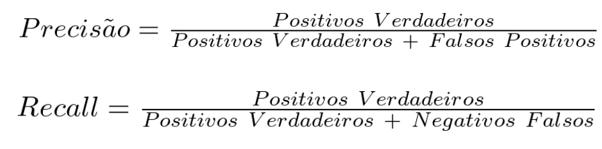

A **precisão** pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Por exemplo, ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de Falso Negativo) no processo.

O **recall** pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo.

A precisão mede o quanto podemos confiar num modelo quando ele prevê que um exemplo pertence a uma determinada classe. Ela é importante se você quiser um modelo que, acuradamente, identifica os exemplos, enquanto o recall é importante se você quiser um modelo que identica todas as informações relevantes em um conjunto de exemplos.

O método **classification_report** retorna as principais métricas de classificação.

Avaliando a precisão e o recall para cada modelo de **Machine Learning**.

In [ ]:
# Imports necessários
from sklearn.metrics import classification_report

# classes do dataset
target_names = ['1','2', '3', '4', '5', '6', '7']

# Executando os pipelines de Machine Learning
for name, model in pipelines_ML:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("%s:\n %s" % (name, classification_report(y_test, predictions, target_names=target_names)))

Nota-se uma alta acurácia, precisão e recall em cada classe para os algoritmos de **LR-orig**, **KNN_orig** e **CART_orig**.

Avaliando a **precisão** e o **recall** para cada modelo de **Ensemble**.

In [ ]:
# Imports necessários
from sklearn.metrics import precision_score, recall_score

Para não retornar a pontuação de cada classe do modelo
 em classificação multiclasse, vamos utilizar o parâmetro **average = "macro"**, onde são calculadas as métricas de cada rótulo e depois calcula-se a média não ponderada como resultado. A opção macro não leva em consideração o desbalanceamento de classes.

In [ ]:
# Executando os pipelines de Ensembles com dados originais
for name, model in models_ensembles:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    precision_score_result =  precision_score(y_test, predictions, average="macro")
    recall_score_result = recall_score(y_test, predictions, average="macro")
    msg1 = "%s_orig: (precision_score) %.3f" % (name, precision_score_result) # formatando para 3 casas decimais
    msg2 = "%s_orig: (recall_score) %.3f" % (name, recall_score_result) # formatando para 3 casas decimais
    print(msg1)
    print(msg2)
    print("===========================================================================")

In [ ]:
# Executando os pipelines de Ensembles com dados normalizados
for name, model in pipelines_ensembles_norm:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    precision_score_result =  precision_score(y_test, predictions, average="macro")
    recall_score_result = recall_score(y_test, predictions, average="macro")
    msg1 = "%s_norm: (precision_score) %.3f" % (name, precision_score_result) # formatando para 3 casas decimais
    msg2 = "%s_norm: (recall_score) %.3f" % (name, recall_score_result) # formatando para 3 casas decimais
    print(msg1)
    print(msg2)
    print("===========================================================================")

In [ ]:
# Executando os pipelines de Ensembles com padronização dos dados
for name, model in pipelines_ensembles_padr:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    precision_score_result =  precision_score(y_test, predictions, average="macro")
    recall_score_result = recall_score(y_test, predictions, average="macro")
    msg1 = "%s_padr: (precision_score) %.3f" % (name, precision_score_result) # formatando para 3 casas decimais
    msg2 = "%s_padr: (recall_score) %.3f" % (name, recall_score_result) # formatando para 3 casas decimais
    print(msg1)
    print(msg2)
    print("===========================================================================")

Verifica-se uma precisão e recall ainda melhor utilizando os métodos ensembles, com exceção do AdaBoost.

Para um modelo de aprendizado automático, uma alta precisão e um alto recall são ideais. No entanto, frequentemente, esses parâmetros podem ser mutuamente exclusivos, e o modelo pode ter que escolher entre uma alta precisão ou um alto recall. No nosso caso, a maioria doos modelos apresentaram uma alta precisão e um alto recall, com pequenas diferenças.

### **Otimização de Hiperparâmetros**

Após uma primeira avaliação, treinando os modelos com os algoritmos de Machine Learning possíveis para tratar um problema e analisando os resultados obtidos, é interessante realizarmos o tuning (ajuste) dos melhores algoritmos encontrados até então, a fim de buscarmos construir o melhor modelo para o problema. Por isso a otimização de hiperparâmetros é um passo crucial no desenvolvimento de modelos de machine learning. A escolha adequada dos valores dos hiperparâmetros pode levar a um modelo com melhor desempenho e generalização, enquanto valores inadequados podem resultar em modelos que não atendem às expectativas.

Vamos explorar métodos avançados para a seleção de hiperparâmetros em aprendizado de máquina:

> **Grid Search:**

Com a pesquisa em grade, você especifica uma lista de hiperparâmetros e uma métrica de desempenho, e o algoritmo trabalha com todas as combinações possíveis para determinar o melhor ajuste. A pesquisa em grade funciona bem, mas é relativamente tediosa e consome muitos recursos computacionais, especialmente com um grande número de hiperparâmetros.

> **Randomized Search:**

Embora baseada em princípios semelhantes aos da pesquisa em grade, a pesquisa aleatória seleciona grupos de hiperparâmetros aleatoriamente em cada iteração. Funciona bem quando um número relativamente pequeno de hiperparâmetros determina principalmente o resultado do modelo.

> **Otimização bayesiana:**

A otimização bayesiana é uma técnica baseada no teorema de Bayes, que descreve a probabilidade de ocorrência de um evento relacionado ao conhecimento atual. Quando isso é aplicado à otimização de hiperparâmetros, o algoritmo cria um modelo probabilístico a partir de um conjunto de hiperparâmetros que otimiza uma métrica específica. Ele usa análise de regressão para escolher iterativamente o melhor conjunto de hiperparâmetros.


Exemplos de hiperparâmetros para os algoritmos que avaliamos neste projeto:

*   **KNN**: número de vizinhos a considerar (k) e métrica de distância utilizada.
*   **SVM**: tipo de kernel utilizado e rigidez da margem.



#### Ajuste de hiperparâmetros para o **KNN**

In [ ]:
# normalizar e padronizar os dados
norm_scaler = ('NormScaler', RobustScaler())
standard_scaler = ('StandardScaler', StandardScaler())

In [ ]:
# Imports necessários
from sklearn.neighbors import KNeighborsClassifier

# Tuning do KNN
from sklearn.model_selection import GridSearchCV

np.random.seed(7) # definindo uma semente global para este bloco
pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-norm', Pipeline(steps=[norm_scaler, knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

print("Dados de treino - otimizando o KNN \n")
# Prepara e executa o GridSearchCV
for name, model in pipelines:
  grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, refit = True)
  grid.fit(X_train, y_train)
  # imprime a melhor configuração
  print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))
  print(grid.best_estimator_)

Executando a predição do modelo com os dados de teste no modelo **KNN otimizado** e dados originais, com os quais obteve-se o melhor resultado: **96,5%**.

In [ ]:
# definindo o KNN com os melhores parâmetros
knn = ('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=3))

# Definindo os componentes do pipeline
pipelines = []
pipelines.append(('KNN-orig', Pipeline(steps=[knn])))

print("Dados de teste - KNN otimizado - Dados originais\n")

# Prepara e executa o fit nos dados de treino e faz as predições com os dados de teste no KNN otimizado
for name, model in pipelines:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  result_acuracia = accuracy_score(y_test, predictions)
  print(name + " (OTIMIZADO): " + str(result_acuracia) + "\n")
  print("Matriz de confusão - " + name + " (OTIMIZADO): " + "\n")
  conf_mx = confusion_matrix(y_test, predictions)
  print(conf_mx)
  print("\n Métricas de classificação: \n %s:\n %s" % (name, classification_report(y_test, predictions, target_names=target_names)))

Verifica-se que a otimização de hiperparâmetros para o algoritmo **KNN** obteve o mesmo resultado que sem a otimização, a acurácia foi mantida em **96,4%**.

#### Ajuste de hiperparâmetros para o **SVM**.

In [ ]:
# Imports necessários
from sklearn.svm import SVC

# Tuning do SVM
from sklearn.model_selection import GridSearchCV

In [ ]:
# normalizar e padronizar os dados
norm_scaler = ('NormScaler', RobustScaler())
standard_scaler = ('StandardScaler', StandardScaler())

In [ ]:
# Imports necessários
from sklearn.svm import SVC

# Tuning do SVM
from sklearn.model_selection import GridSearchCV

np.random.seed(7) # definindo uma semente global para este bloco
pipelines = []

# Definindo os componentes do pipeline
SVM = ('SVM', SVC())

pipelines.append(('SVM-orig', Pipeline(steps=[SVM])))
pipelines.append(('SVM-norm', Pipeline(steps=[norm_scaler, SVM])))
pipelines.append(('SVM-padr', Pipeline(steps=[standard_scaler, SVM])))

# defining parameter range
param_grid = {'SVM__C': [0.1, 1, 10, 100, 1000],
              'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'SVM__kernel':['rbf']}

print("Dados de treino - otimizando o SVM \n")
# Prepara e executa o GridSearchCV
for name, model in pipelines:
  grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, refit = True)
  grid.fit(X_train, y_train)
  # imprime a melhor configuração
  print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))
  print(grid.best_estimator_)

Executando a predição do modelo com os **dados de teste** no modelo **SVM otimizado**.

In [ ]:
# definindo o SVM com os melhores parâmetros
SVM = ('SVM', SVC(C=10, gamma=0.01, kernel = 'rbf'))

# Definindo os componentes do pipeline
pipelines = []
pipelines.append(('SVM-orig', Pipeline(steps=[SVM])))

print("Dados de teste - SVM otimizado - Dados originais\n")

# Prepara e executa o fit nos dados de treino e faz as predições com os dados de teste no KNN otimizado
for name, model in pipelines:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  result_acuracia = accuracy_score(y_test, predictions)
  print(name + " (OTIMIZADO): " + str(result_acuracia) + "\n")
  print("\n Métricas de classificação: \n %s:\n %s" % (name, classification_report(y_test, predictions, target_names=target_names)))

Verifica-se que a otimização de hiperparâmetros para o algoritmo SVM obteve um ganho significativo de acurácia, sem a otimização a acurácia foi **SVM-norm: (Acurácia dados de teste) 91,4%** com dados normalizados, e com a otimização o resultado foi **96,8 %**, utilizando dados originais. O SVM mostra-se especialmente eficaz em problemas de classificação com dados não lineares.

**Matriz de confusão** para as predições dos dados de teste utilizando o modelo treinado **SVM otimizado** com os dados originais.

In [ ]:
print("Matriz de confusão - SVM-orig (OTIMIZADO): " + "\n")
conf_mx = confusion_matrix(y_test, predictions)
print(conf_mx)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# Avaliação de Resultados

Avaliando as predições dos modelos treinados, ficamos com os seguintes melhores resultados para o **conjunto de teste**:

**GB_orig:** (Acurácia dados de teste) **0.974**

**RF_orig**: (Acurácia dados de teste) **0.971**

**Bagging_norm:** (Acurácia dados de teste) **0.969**

**SVM_orig (OTIMIZADO): 0.968**

**CART-orig:** (Acurácia dados de teste) **0.967**

**Bagging_orig:** (Acurácia dados de teste) **0.967**

**KNN-orig (OTIMIZADO): 0.964**

Por meio do conjunto de teste, verificamos que alcançamos a melhor acurácia de **97,4%** em dados não vistos através do algoritmo de ensemble **Boosting**.


Vamos agora preparar o modelos **SVM otimizado, KNN otimizado, RL, CART e alguns modelos ensembles** para utilização em produção. Para isso vamos treiná-los com todo o dataset, e não apenas o conjunto de treino.

Como nos dados de teste, os modelos se mostraram melhores **usando os dados originais do dataset**, não vamos aplicar a normalização e nem a padronização, com exceção apenas do **Bagging** que se mostrou melhor com dados normalizados.

In [ ]:
# Predição do modelo SVM OTIMIZADO, com dados originais
model_SVM = SVC(C=10, gamma=0.01, kernel = 'rbf')

# fazendo o fit com todos os dados do dataset
model_SVM.fit(X, y)

model_SVM_results_score = model_SVM.score(X, y)
print("SVM_orig (OTIMIZADO) com todo o dataset: %s" % model_SVM_results_score)

In [ ]:
# definindo o KNN com os melhores parâmetros
model_KNN = KNeighborsClassifier(metric='manhattan', n_neighbors=1)

# fazendo o fit com todos os dados do dataset
model_KNN.fit(X, y)

model_KNN_results_score = model_KNN.score(X, y)
print("KNN_orig (OTIMIZADO) com todo o dataset: %s" % model_KNN_results_score)

In [ ]:
# Regressão Logística
model_LR = reg_log[1]

# fazendo o fit com todos os dados do dataset
model_LR.fit(X, y)

model_LR_results_score = model_LR.score(X, y)
print("Regressão Logística com todo o dataset: %s" % model_LR_results_score)

In [ ]:
# CART
model_CART = cart[1]

# fazendo o fit com todos os dados do dataset
model_CART.fit(X, y)

model_CART_results_score = model_CART.score(X, y)
print("CART com todo o dataset: %s" % model_CART_results_score)

In [ ]:
# modelo ensemble RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

# fazendo o fit com todos os dados do dataset
model_RF.fit(X, y)

model_RF_results_score = model_RF.score(X, y)
print("RF com todo o dataset: %s" % model_RF_results_score)

In [ ]:
# modelo ensemble BaggingClassifier
model_BGC = BaggingClassifier(base_estimator=base, n_estimators=num_trees)
norm_scaler = RobustScaler()

# Normalização com todos os dados do dataset
norm_scaler.fit(X)
X_norm = norm_scaler.transform(X)

# fazendo o fit com todos os dados do dataset
model_BGC.fit(X_norm, y)

model_BGC_results_score = model_BGC.score(X_norm, y)

print("Bagging com todo o dataset: %s" % model_BGC_results_score)

In [ ]:
# modelo ensemblo GradientBoostingClassifier
model_GBC = GradientBoostingClassifier(n_estimators=num_trees)

# fazendo o fit com todos os dados do dataset
model_GBC.fit(X, y)

model_GBC_results_score = model_GBC.score(X, y)
print("Boosting com todo o dataset: %s" % model_GBC_results_score)

#### Predição com dados de **Produção** - novas instâncias

Finalmente, vamos simular a aplicação do modelo **KNN otimizado**, **SVM otimizado, RL e alguns modelos ensembles**, para fins comparativos, em dados não vistos, imaginando que chegaram **10 novas instâncias**, mas que não sabemos a classe de saída. Poderemos então aplicar nossos modelos recém-treinados para fazer a predição das classes.

**Tabela com 10 novas instâncias para apreciação do modelo.**

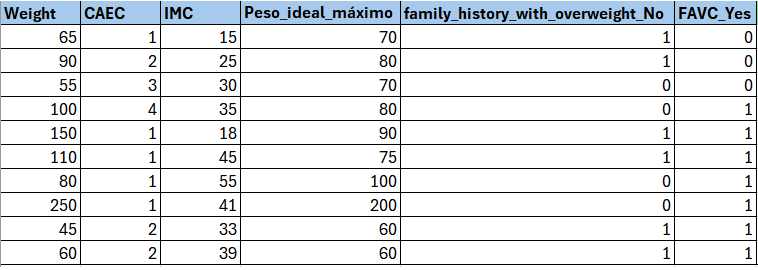

In [ ]:
# novos dados
data = {'Weight': [65, 90, 55, 100, 150, 110, 80, 250, 45, 60],
        'CAEC': [1, 2, 3, 4, 1, 1, 1, 1, 2, 2],
        'IMC': [15, 25, 30, 35, 18, 45, 55, 41, 33, 39],
        'Peso_ideal_maximo': [70, 80, 70, 80, 90, 75, 100, 200, 60, 60],
        'family_history_with_overweight_No': [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
        'FAVC_Yes': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]}

atributos = ['Weight', 'CAEC', 'IMC', 'Peso_ideal_maximo', 'family_history_with_overweight_No', 'FAVC_Yes']

# criando o dataframe com as 10 novas instâncias
X_entrada = pd.DataFrame(data, columns=atributos)

In [ ]:
# predições SVM OTIMIZADO
saidas = model_SVM.predict(X_entrada)
print("Predições SVM_orig (OTIMIZADO): %s" % saidas)

In [ ]:
# predições KNN OTIMIZADO
saidas = model_KNN.predict(X_entrada)
print("Predições KNN_orig (OTIMIZADO): %s" % saidas)

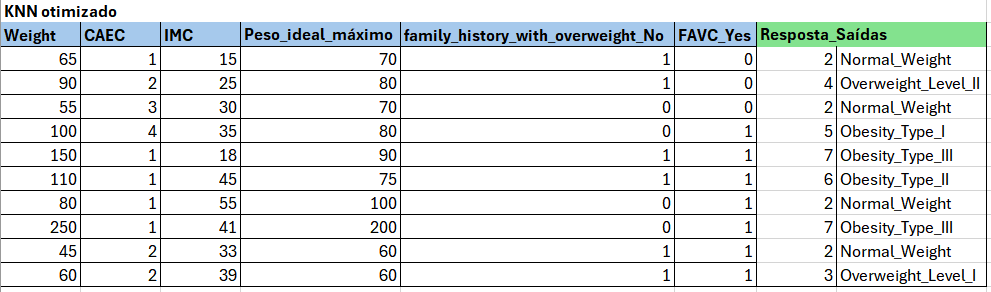

In [ ]:
# predições RL
saidas = model_LR.predict(X_entrada)
print("Predições Regressão Logística: %s" % saidas)

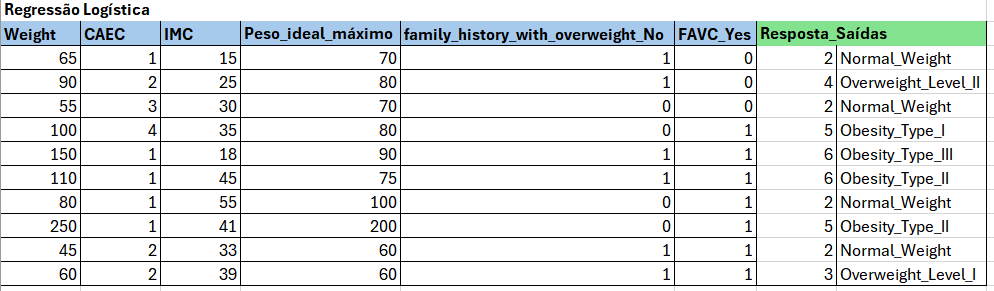

In [ ]:
# predições CART
saidas = model_CART.predict(X_entrada)
print("Predições CART: %s" % saidas)

In [ ]:
# predições Random Forest
saidas = model_RF.predict(X_entrada)
print("Predições RF_orig (OTIMIZADO): %s" % saidas)

In [ ]:
# predições Bagging
norm_scaler = RobustScaler()

# Normalização das novas instâncias de entrada
norm_scaler.fit(X_entrada)
X_entrada_norm = norm_scaler.transform(X_entrada)

saidas = model_BGC.predict(X_entrada_norm)
print("Predições Bagging: %s" % saidas)

In [ ]:
# predições Boosting
saidas = model_GBC.predict(X_entrada)
print("Predições Boosting: %s" % saidas)

Os métodos **KNN otimizado** e **Regressão Logística** obtiveram o melhor resultado para as **10 novas instâncias**.

Mostrando graficamente a dispersão dos dados em todo o dados de treino, considerando todo o dataset.

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X['Weight'], X['Peso_ideal_maximo'], c=y, s=60)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X['Weight'], X['IMC'], c=y, s=60)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X['Weight'], X['CAEC'], c=y, s=60)
plt.show()

Avaliando outro conjunto de dados com **17 novas instâncias**.

In [ ]:
# novos dados
data = {'Weight': [65, 90, 55, 100, 150, 74, 88, 250, 45, 60, 78, 40, 55, 93, 136, 170, 128],
        'CAEC': [1, 2, 3, 4, 1, 1, 1, 4, 1, 1, 2, 3, 4, 3, 4, 4, 1],
        'IMC': [45, 25, 30, 35, 18, 31, 21, 30, 15, 35, 19, 29, 29, 32, 30, 35, 29],
        'Peso_ideal_maximo': [60, 80, 70, 80, 90, 75, 100, 250, 60, 50, 80, 40, 50, 100, 120, 89, 100],
        'family_history_with_overweight_No': [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
        'FAVC_Yes': [0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]}

atributos = ['Weight', 'CAEC', 'IMC', 'Peso_ideal_maximo', 'family_history_with_overweight_No', 'FAVC_Yes']

# criando o dataframe com as 17 novas instâncias
X_entrada2 = pd.DataFrame(data, columns=atributos)

In [ ]:
# predições SVM OTIMIZADO
saidas = model_SVM.predict(X_entrada2)
print("Predições SVM_orig (OTIMIZADO): %s" % saidas)

In [ ]:
# predições KNN OTIMIZADO
saidas = model_KNN.predict(X_entrada2)
print("Predições KNN_orig (OTIMIZADO): %s" % saidas)

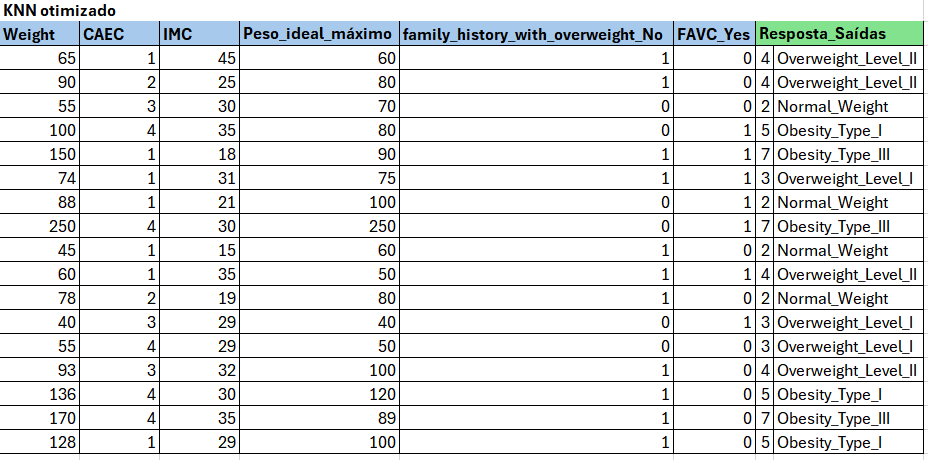

In [ ]:
# predições RL
saidas = model_LR.predict(X_entrada2)
print("Predições Regressão Logística: %s" % saidas)

In [ ]:
# predições CART
saidas = model_CART.predict(X_entrada2)
print("Predições CART: %s" % saidas)

In [ ]:
# predições Random Forest
saidas = model_RF.predict(X_entrada2)
print("Predições RF_orig: %s" % saidas)

In [ ]:
# predições Bagging

# Normalização das novas instâncias de entrada
norm_scaler.fit(X_entrada2)
X_entrada2_norm = norm_scaler.transform(X_entrada2)

saidas = model_BGC.predict(X_entrada2_norm)
print("Predições Bagging: %s" % saidas)

In [ ]:
# predições
saidas = model_GBC.predict(X_entrada2)
print("Predições Boosting: %s" % saidas)

O modelo **KNN otimizado** se mostrou o mais eficiente nas predições com novos dados não conhecidos, pois verifica-se que leva em consideração a maioria das variávies aprendidas no treinamento. O modelo de regressão logística também se mostrou eficaz, sendo que as respostas dos 2 modelos ficaram muito próximas. Esses 2 modelos parecem ter conseguido generalizar bem para os novos dados. Por sua vez, os modelos **ensembles** e o **CART** (árvore de decisão), embora tenham apresentado a melhor acurácia com os dados de treino e teste, e principalmente utilizando todo o dataset como treino (100% de acurácia), para os novos dados, os modelos não se mostraram tão eficazes. Nesses modelos parece ter havido um **sobreajuste** com a variável **IMC**, e nas predições essa variável foi uma das únicas a ser levada em consideração. Já com o modelo **SVM** parece ter ocorrido um **underfitting** principalmente com dados de outliers.

Árvore crescida até sua profundidade máxima pode decorar o conjunto de treino (o temido **overfitting**), o que pode degradar seu poder preditivo quando aplicado a novos dados. Isso pode ser mitigado "podando" a árvore de decisão ao atribuir uma profundidade máxima ou uma quantidade máxima de folhas.


### Salvando o modelo treinado em um arquivo

Em Machine Learning é bastante comun que se faça necessário treinar e salvar nossos modelos em um arquivo e restaurá-los para, por exemplo, testá-los com novos dados, ou compara o desempenho de vários modelos. Esse procedimento de salvar o modelo é conhecido como **serialização de objetos**, que é basicamente uma representação de um objeto com um fluxo de bytes, a fim de armazená-lo em disco, enviá-lo por uma rede ou salvá-lo em um banco de dados. Por outro lado, o procedimento de restauração/carregamento do modelo é conhecido como **desserialização**.

**Pickle** é uma biblioteca embutida no Python que permite a serialização e desserialização de objetos.

O trecho de código a seguir armazena um modelo treinado que se encontra na variável modelo em um arquivo chamado **pickle_classificador.pkl** utilizando a biblioteca picke.

Iremos salvar o modelo **KNN otimizado**, que apresentou a melhor performance para a predição de novos dados.

In [ ]:
import pickle

# Serialização do objeto do modelo KNN otimizado.
pickle_out = open('pickle_classificador.pkl', 'wb')
pickle.dump(model_KNN, pickle_out)
pickle_out.close()

A partir daí, para carregar o modelo em um objeto Python que possa realizar uma predição utilizando esse modelo, basta disponibilizar o arquivo seguindo as linhas abaixo:

In [ ]:
# Desserialização do objeto do modelo KNN otimizado
pickle_in = open('pickle_classificador.pkl', 'rb')
model_KNN = pickle.load(pickle_in)
pickle_in.close()

In [ ]:
# predições
saidas = model_KNN.predict(X_entrada2)
print("Predições KNN (OTIMIZADO): %s" % saidas)